# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
import DiadFit as pf
pf.__version__

'0.0.59'

## Specifying filetype, and folder as before

In [7]:
MasterFolder = r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\Data\Raman\Leilani-2018"
DayFolder = os.path.join(MasterFolder, "Leilani_2018FI_Dec0622")

meta_path=DayFolder +  '\Metadata'
spectra_path=DayFolder + '\Spectra'
filetype='headless_txt'

if not os.path.exists(MasterFolder + '\OUTPUT'):
    os.mkdir(MasterFolder +'\OUTPUT')

# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [8]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [9]:
GroupN_df

filename rays_present  approx_split    Diad1_pos  \
0                   LL4_10-MI#1.txt        False    103.259289  1285.678494   
1       LL4_12-FI#1_CRR_DiadFit.txt         True    103.264788  1285.727990   
2       LL4_12-FI#2_CRR_DiadFit.txt         True    103.242790  1285.716991   
3       LL4_12-MI#2_CRR_DiadFit.txt         True    103.270288  1285.782986   
4        LL4_2-FI#1_CRR_DiadFit.txt         True    103.264788  1285.464013   
5                   LL4_27-FI#1.txt        False    103.220792  1285.601501   
6                    LL4_3-FI#1.txt        False    103.259289  1285.425516   
7                    LL4_3-FI#2.txt        False    103.462772  1285.238532   
8                    LL4_3-MI#1.txt        False    103.396777  1285.277028   
9                    LL4_4-MI#1.txt        False    103.209793  1285.628999   
10                   LL4_9-FI#2.txt        False    103.231791  1285.601501   
11       LL4_9-MI#1_CRR_DiadFit.txt         True    103.286786  1285.469512   
12  LL7_108-FI#1-R1_CRR_DiadFit.txt         True    103.171296  1286.002967   
13              LL7_108-FI#1-R2.txt        False    103.193294  1285.969970   
14     LL7_108-FI#2_CRR_DiadFit.txt         True    103.110801  1286.063462   
15                 LL7_287-MI#1.txt        False    103.275787  1285.854480   

      Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0   1388.937783  1265.473199  1410.270484  1370.525337      849.221656   
1   1388.992779  1265.544693  1410.314480          NaN      174.621366   
2   1388.959781  1265.313713  1410.330978          NaN      236.737399   
3   1389.053274  1265.517195  1410.369475  1370.602330      386.039003   
4   1388.728801  1265.110230  1410.193490  1370.569333      314.702062   
5   1388.822293  1265.231219  1410.231987  1370.459342      356.071484   
6   1388.684805          NaN          NaN          NaN       35.236199   
7   1388.701303          NaN          NaN          NaN       24.526985   
8   1388.673806  1265.104730  1409.979008  1370.602330      402.651194   
9   1388.838792  1265.203722  1410.336478          NaN      285.685304   
10  1388.833292  1265.181724  1410.045003  1370.547335      317.333417   
11  1388.756299  1265.110230  1410.165992  1370.178866      366.782658   
12  1389.174263  1265.643685  1410.424471  1370.816812      390.909036   
13  1389.163264  1265.654684  1410.391473  1370.844310      506.673015   
14  1389.174263  1265.918661  1410.446469  1370.910304      259.420400   
15  1389.130267  1265.748176  1410.380474          NaN      256.500570   

    Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  HB1_height  \
0      1352.167777  ...  821.492504  727.934989   1556.021674  770.587937   
1       289.449747  ...  691.936926         NaN    843.621366  680.573979   
2       374.833101  ...  698.515519         NaN    903.237399  681.623872   
3       625.471054  ...  731.005443  680.618560   1057.938996  702.596248   
4       552.164243  ...  731.432870  704.207034   1006.802068  712.001054   
5       577.380019  ...  732.339115  691.846567   1037.271496  710.032931   
6        64.807654  ...         NaN         NaN    717.936181         NaN   
7        44.719104  ...         NaN         NaN    687.626961         NaN   
8       733.612344  ...  735.844980  687.407490   1079.551188  710.199978   
9       436.702661  ...  716.868888         NaN    966.285311  707.484173   
10      557.050962  ...  717.044884  688.041144    996.533399  703.762930   
11      669.844667  ...  736.810027  700.407882   1058.582676  719.602459   
12      712.485040  ...  831.981339  775.522124   1162.109018  806.000890   
13      920.683692  ...  790.645005  733.281013   1233.772991  763.602105   
14      461.505830  ...  797.074846  767.889895   1027.120382  787.394620   
15      433.736533  ...  718.600426         NaN    943.700552  704.531828   

    Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0         706.800018        705.000015          

### Now load one file from this group to tweak parameters for

In [10]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'LL4_10-MI#1.txt'

### Lets plot the diad to have a look at it

LL4_10-MI#1.txt


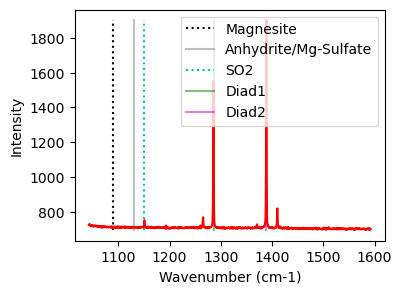

In [11]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [12]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [13]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=849.2216557513482, HB_prom=63.38792490995934, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.644293       1285.644293         0.00382       1231.455955   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.552023                  0             857.097057   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  
0        4.332906        0.566845    1.104046  Flagged Warnings:

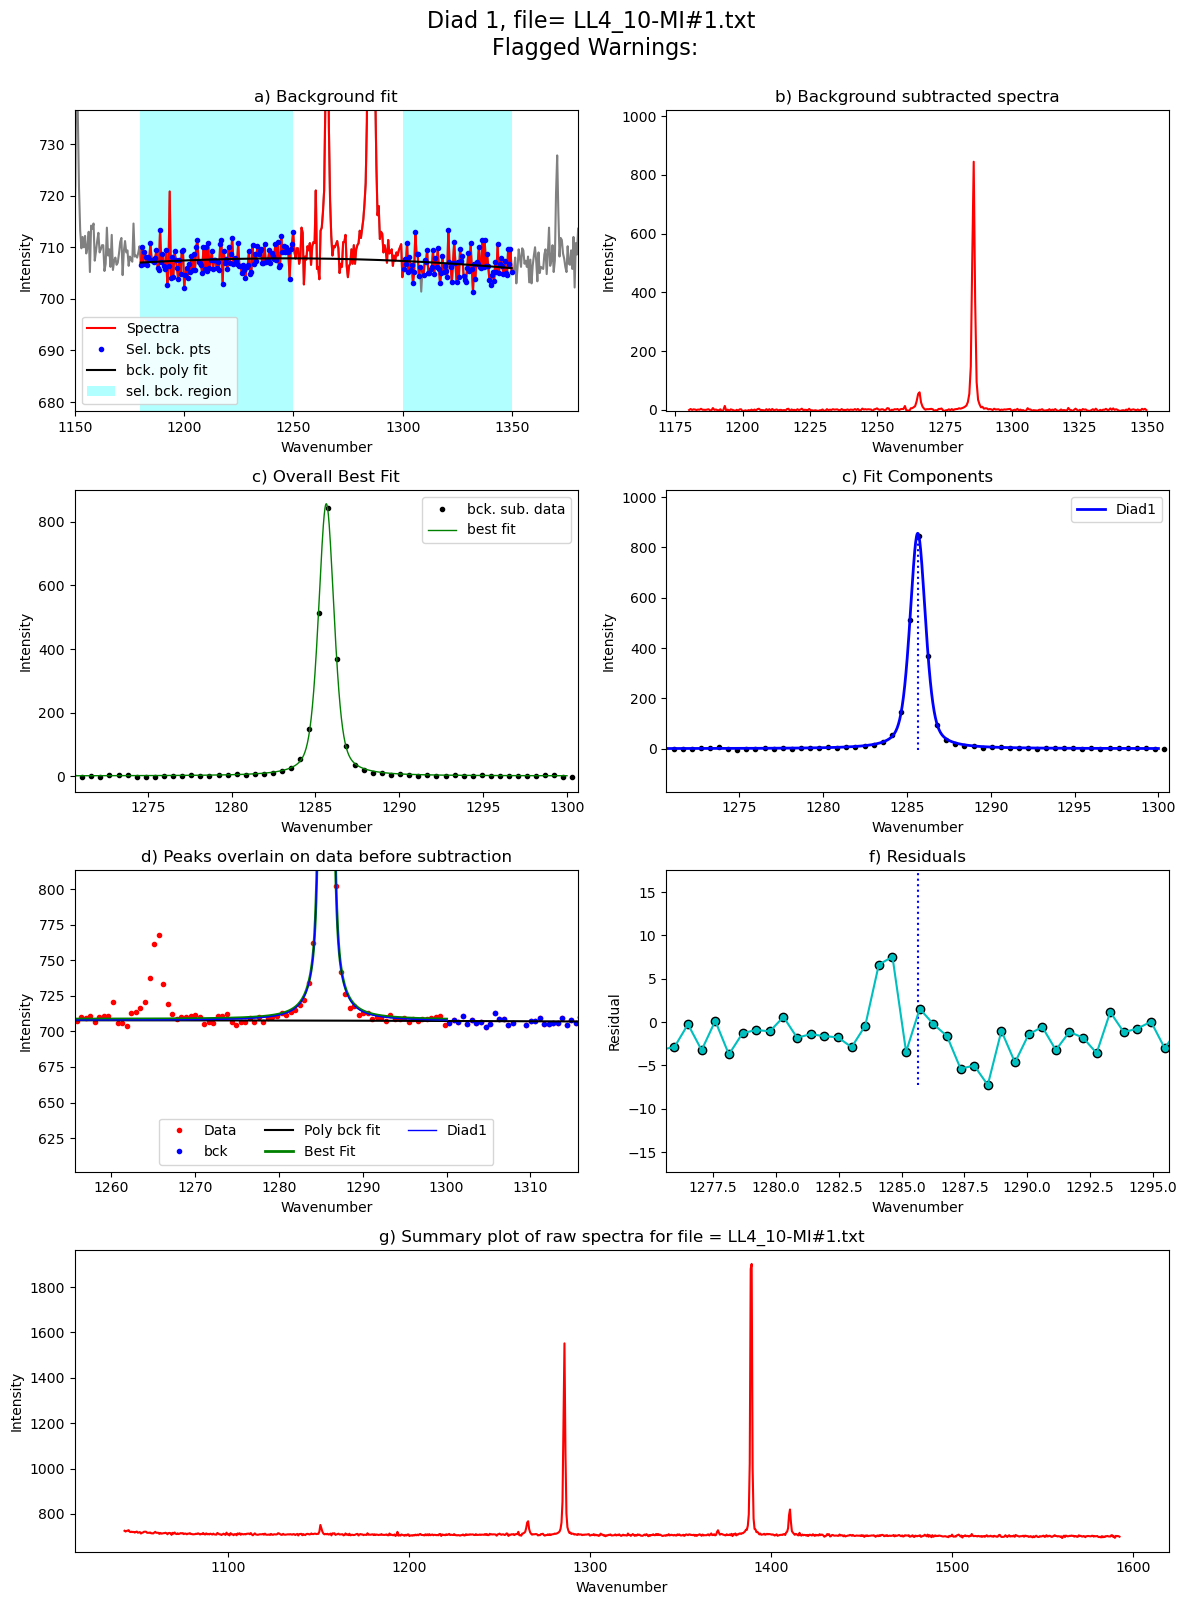

In [14]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [15]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [16]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3,
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=1352.1677770652984, HB_prom=117.89249786294033, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

In [17]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=True, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.926109       1388.926109        0.003768       1840.374821   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.487892                  0            1486.433966   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  
0        5.195587        0.502566    0.975784  Flagged Warnings:

### Update the sigma

In [18]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.48789205058336776


## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/16 [00:00<?, ?it/s]

 12%|█▎        | 2/16 [00:03<00:26,  1.91s/it]

refit attempt 1
refit attempt  =2, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =3, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =4, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =5, Flagged Warnings: No Error
Flagged Warnings: No Error
Got to 5 iteratoins and still couldnt adjust the fit parameters


 31%|███▏      | 5/16 [00:09<00:20,  1.84s/it]

refit attempt 1
refit attempt  =2, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =3, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =4, Flagged Warnings: No Error
Flagged Warnings: No Error
refit attempt  =5, Flagged Warnings: No Error
Flagged Warnings: No Error
Got to 5 iteratoins and still couldnt adjust the fit parameters


 62%|██████▎   | 10/16 [00:20<00:13,  2.24s/it]c:\users\charl\documents\python dev\diadfit\src\DiadFit\diads.py:2915: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
100%|██████████| 16/16 [00:35<00:00,  2.23s/it]


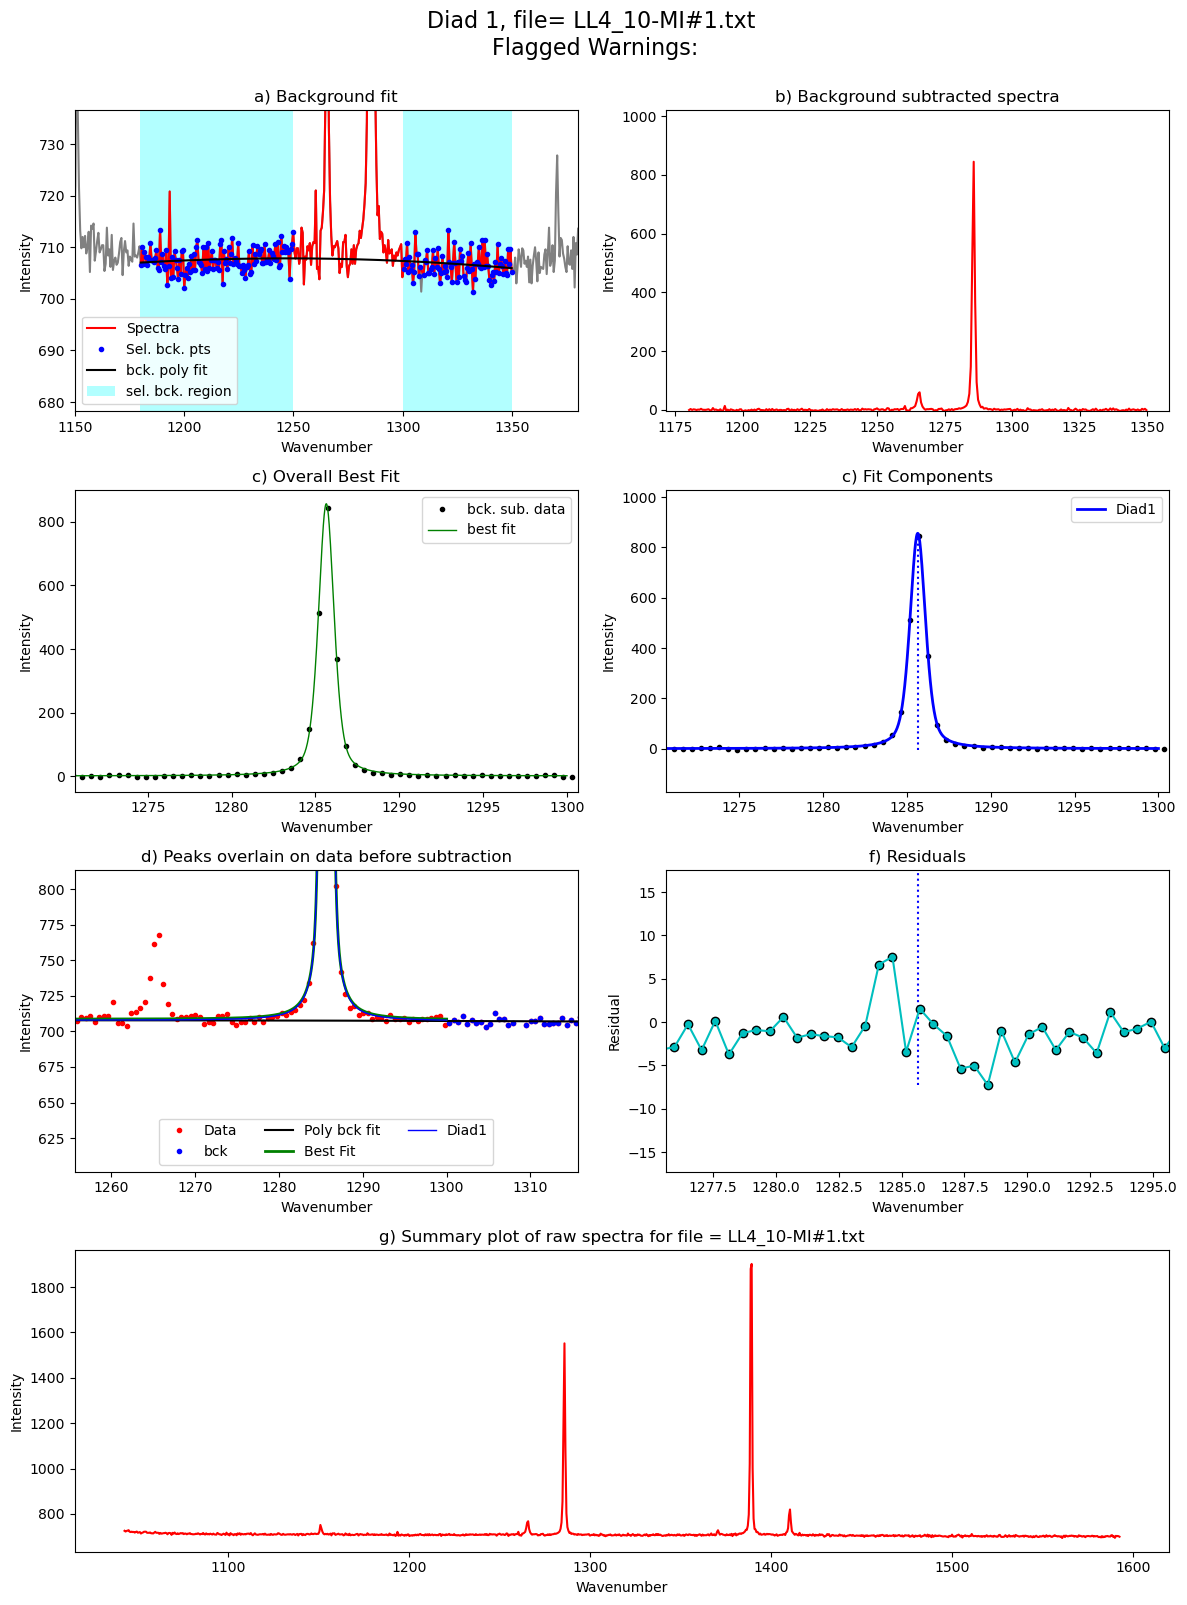

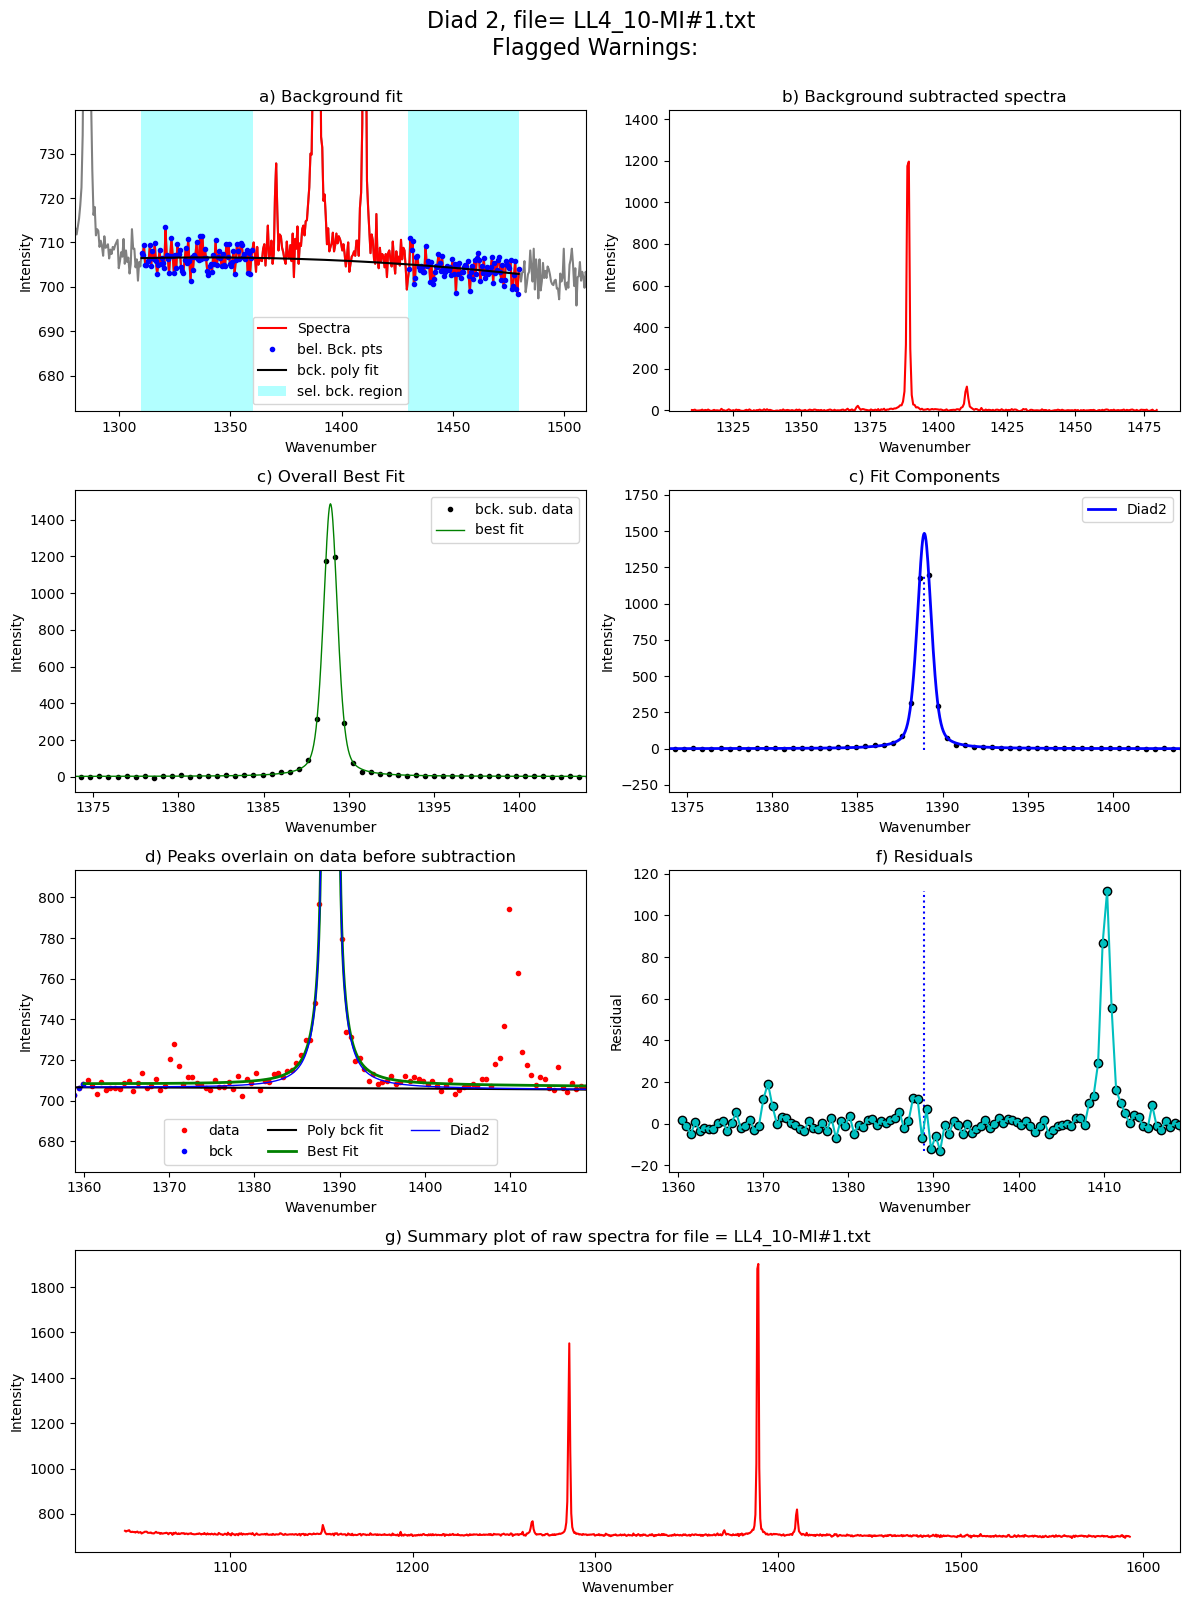

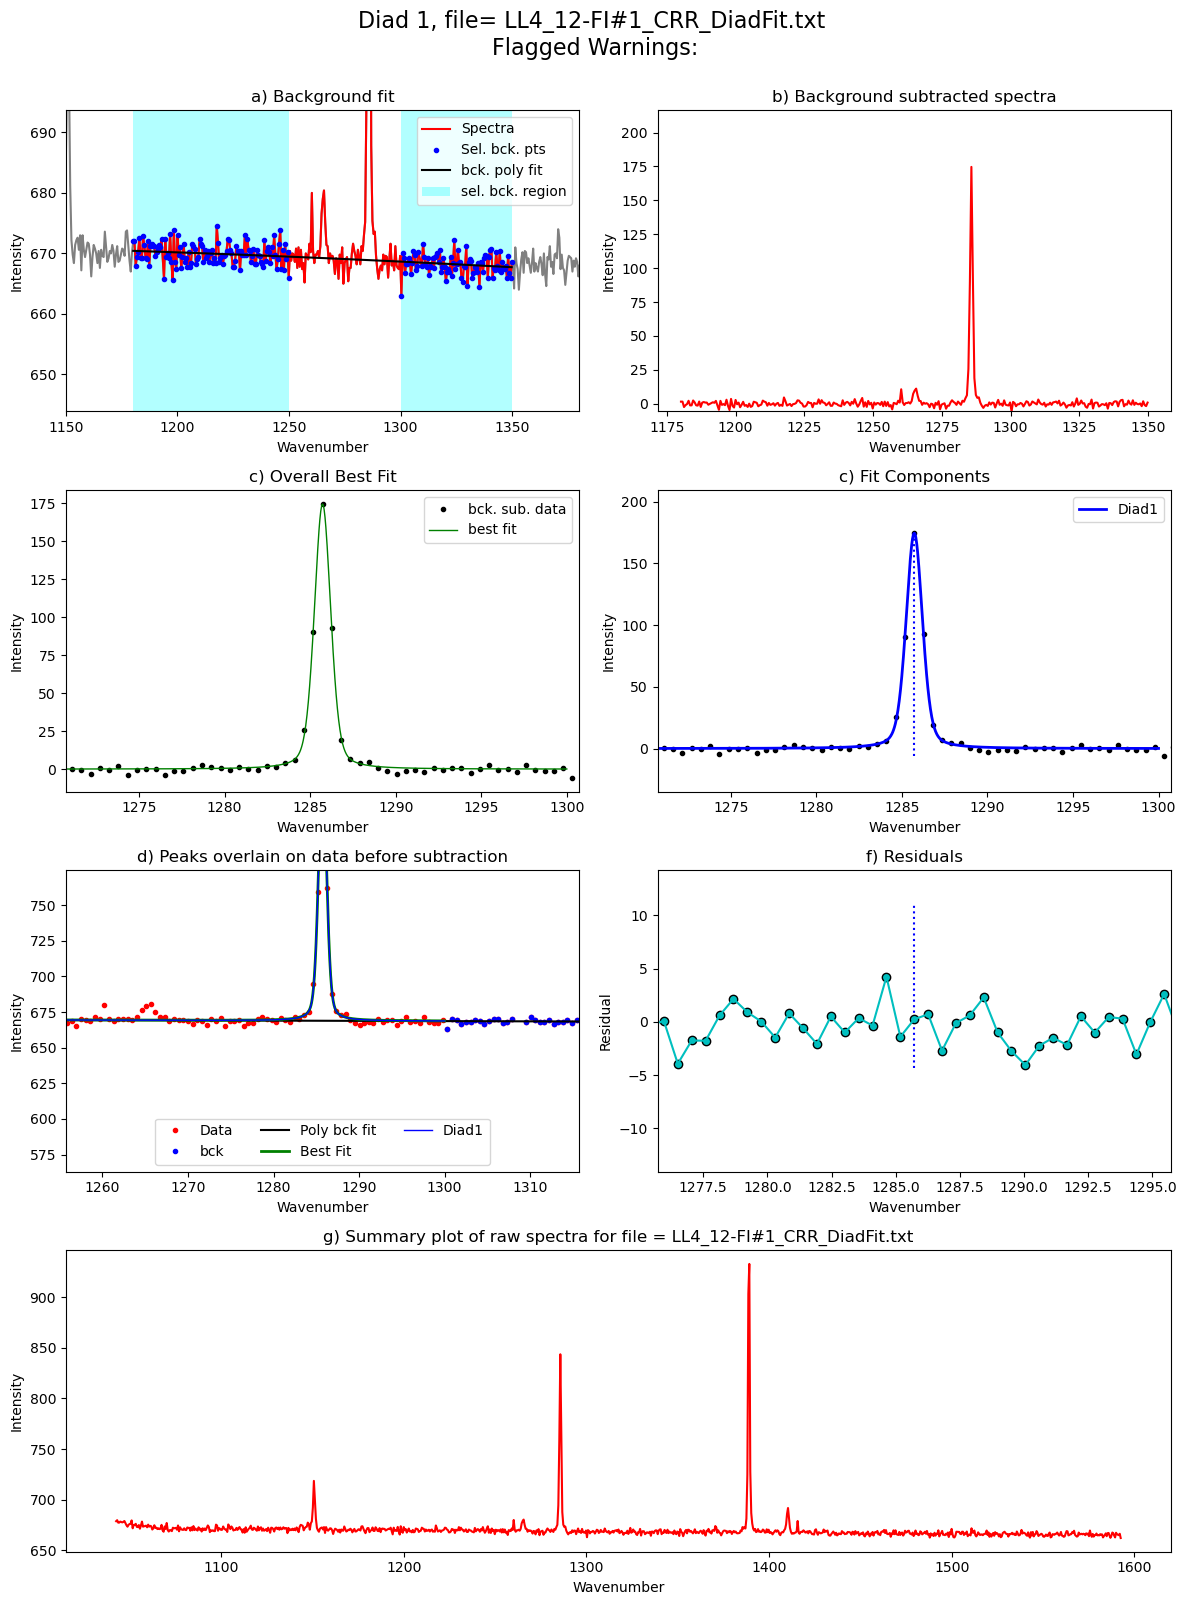

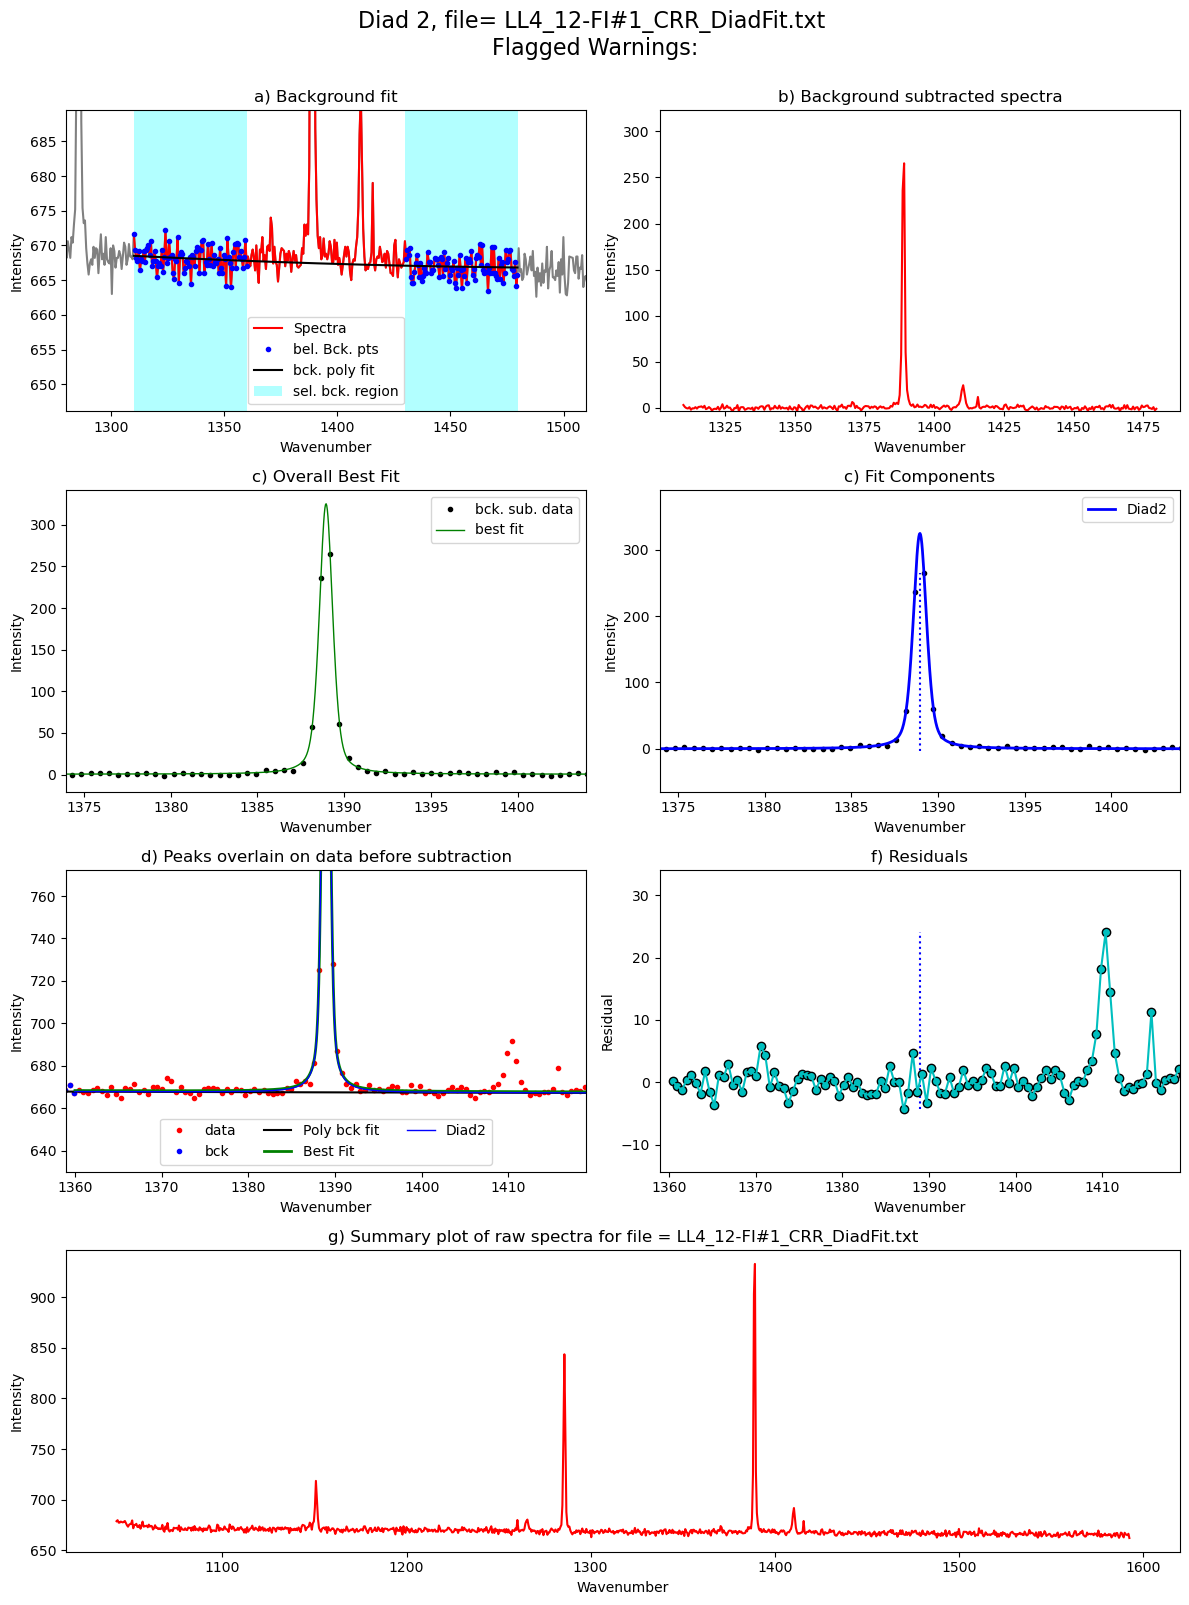

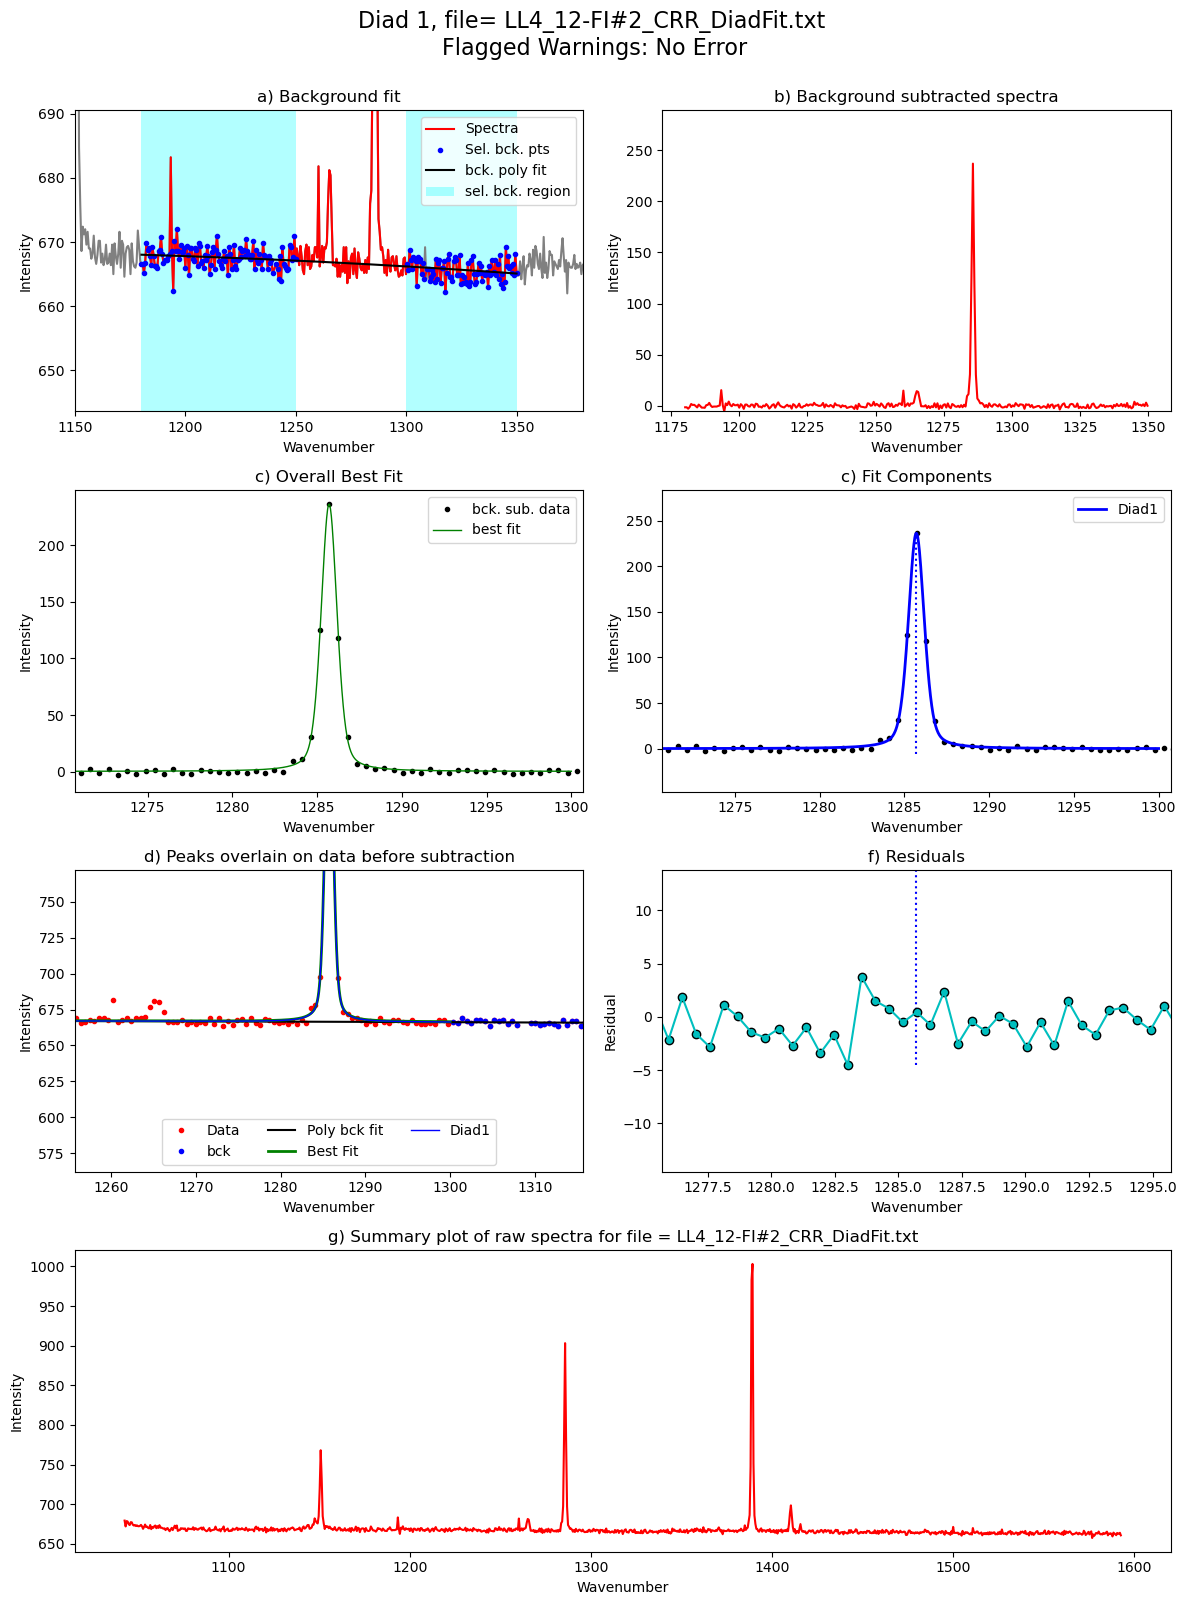

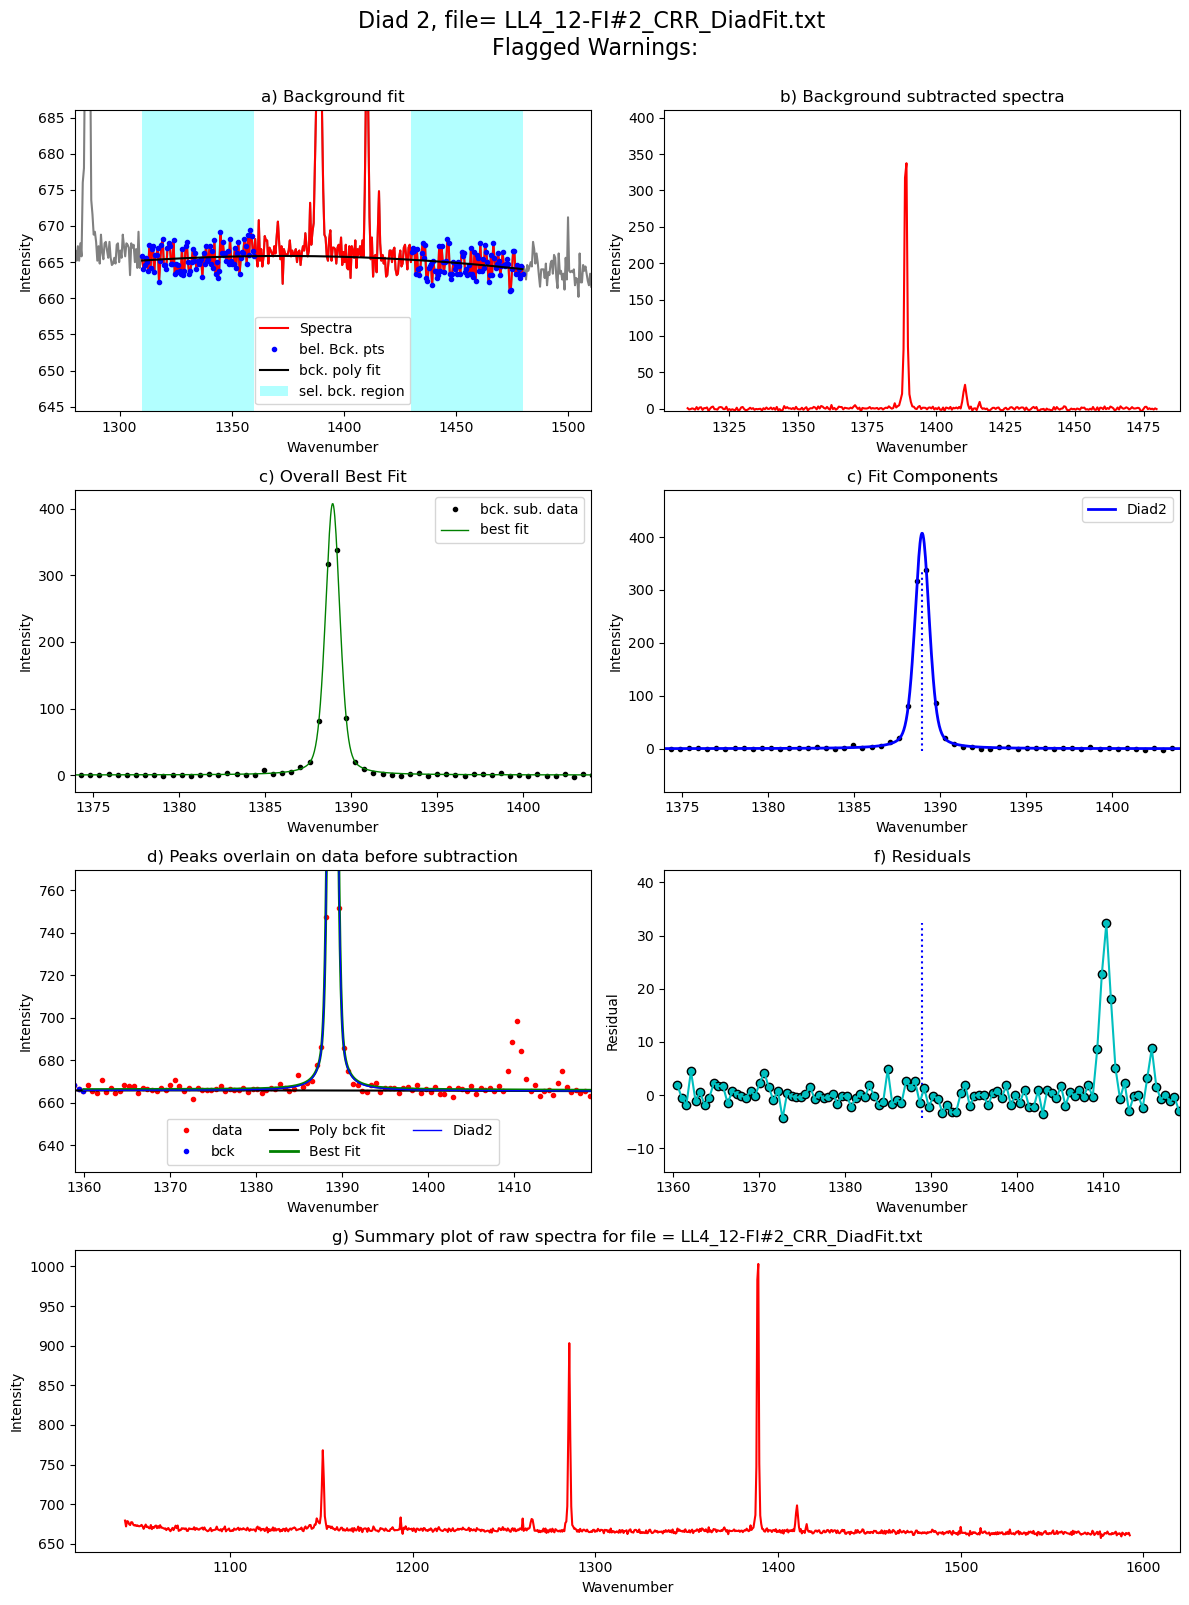

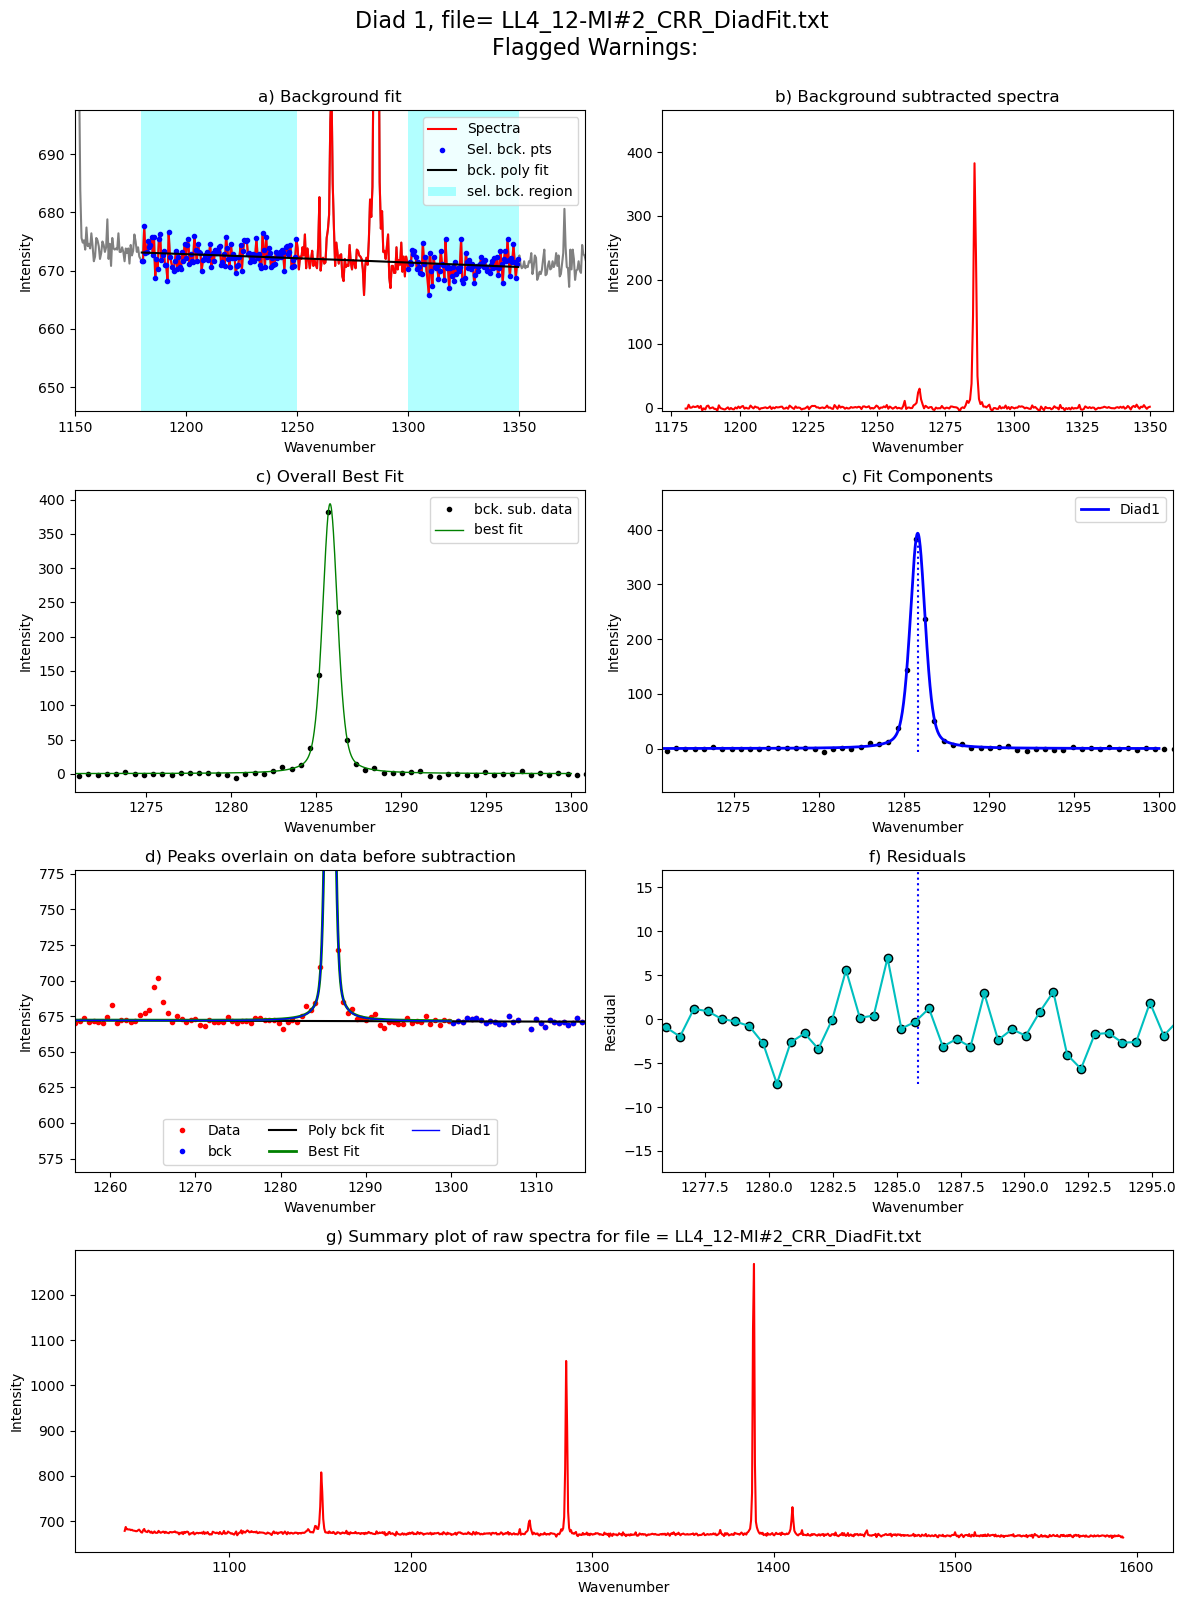

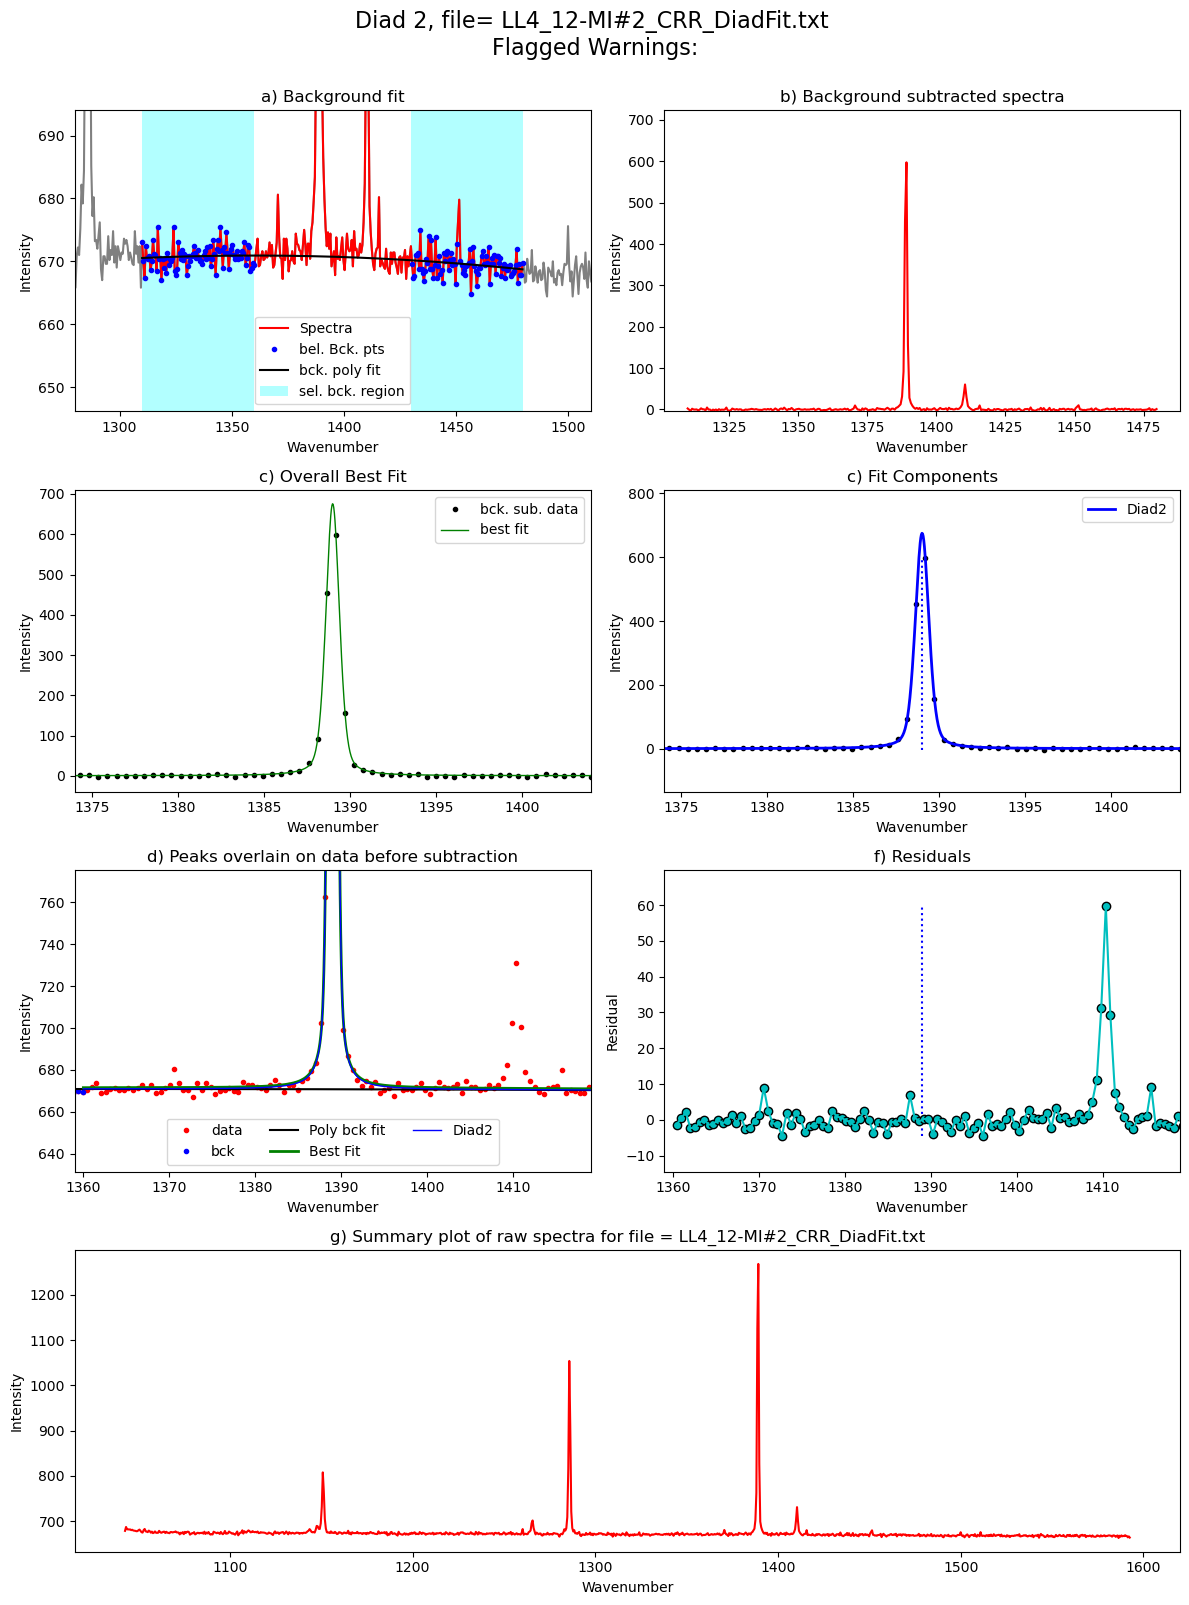

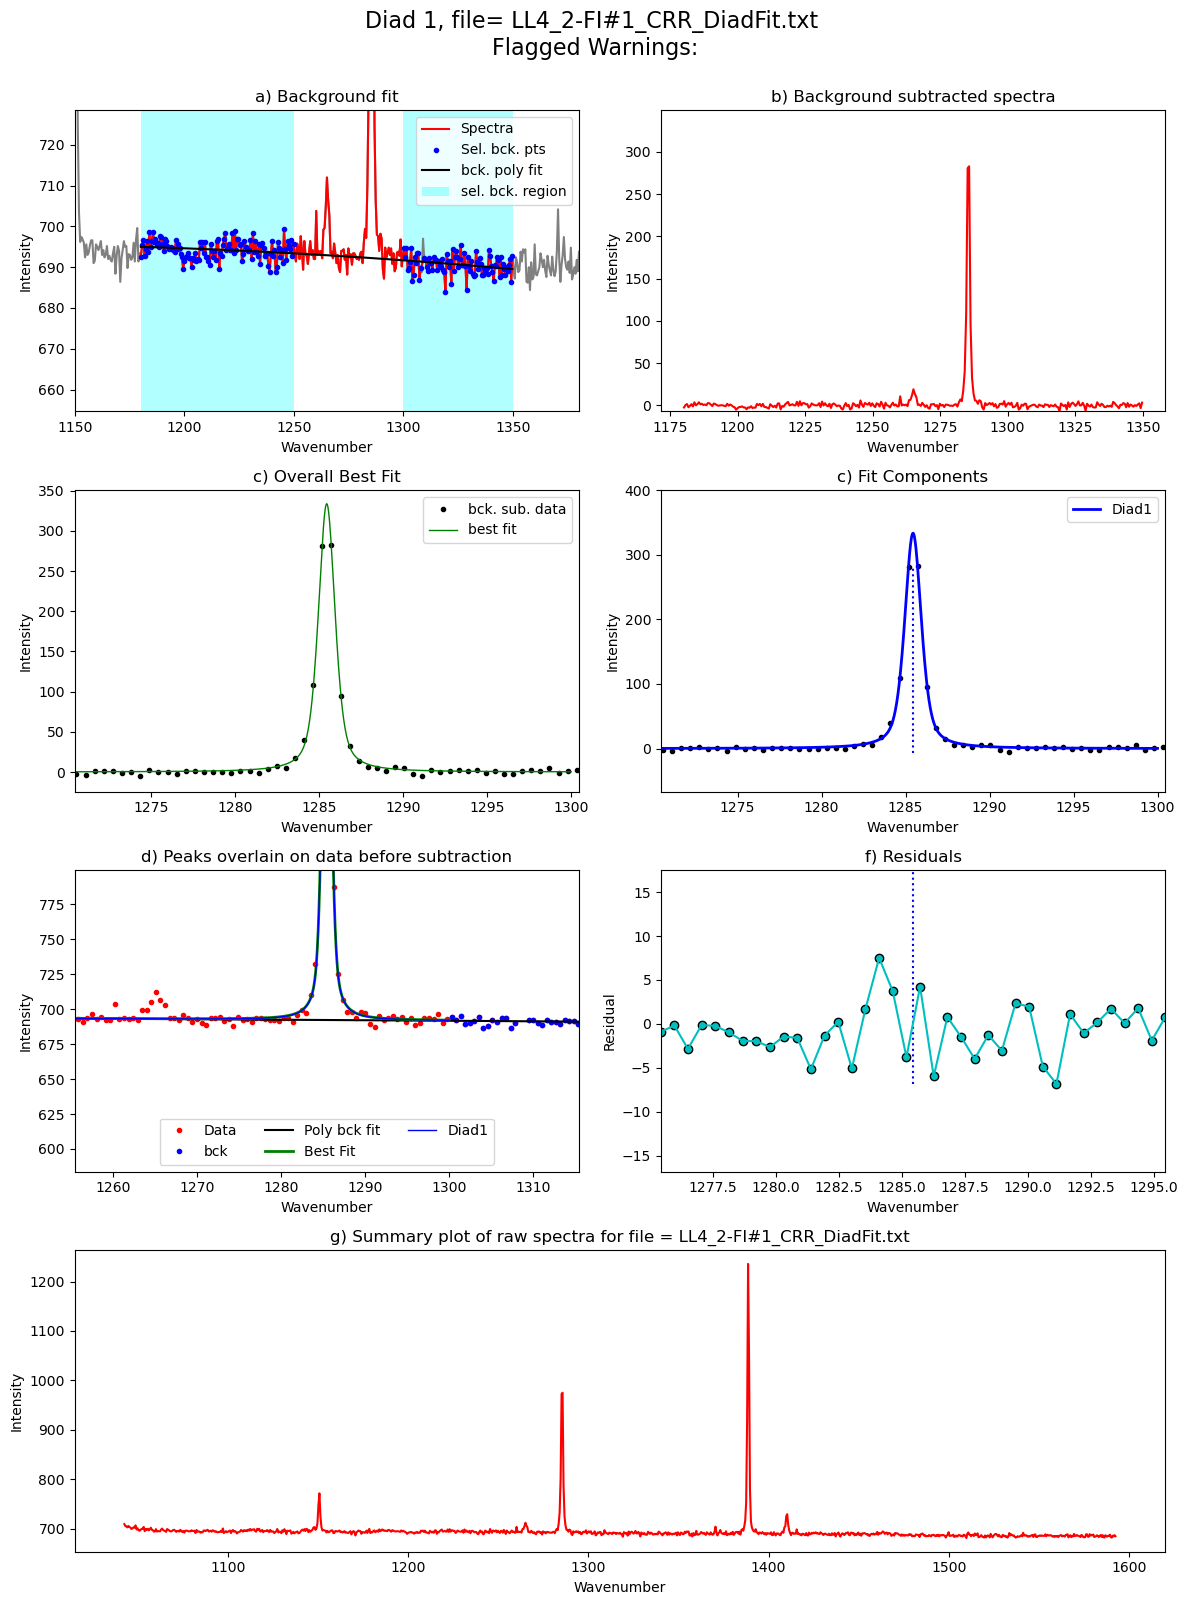

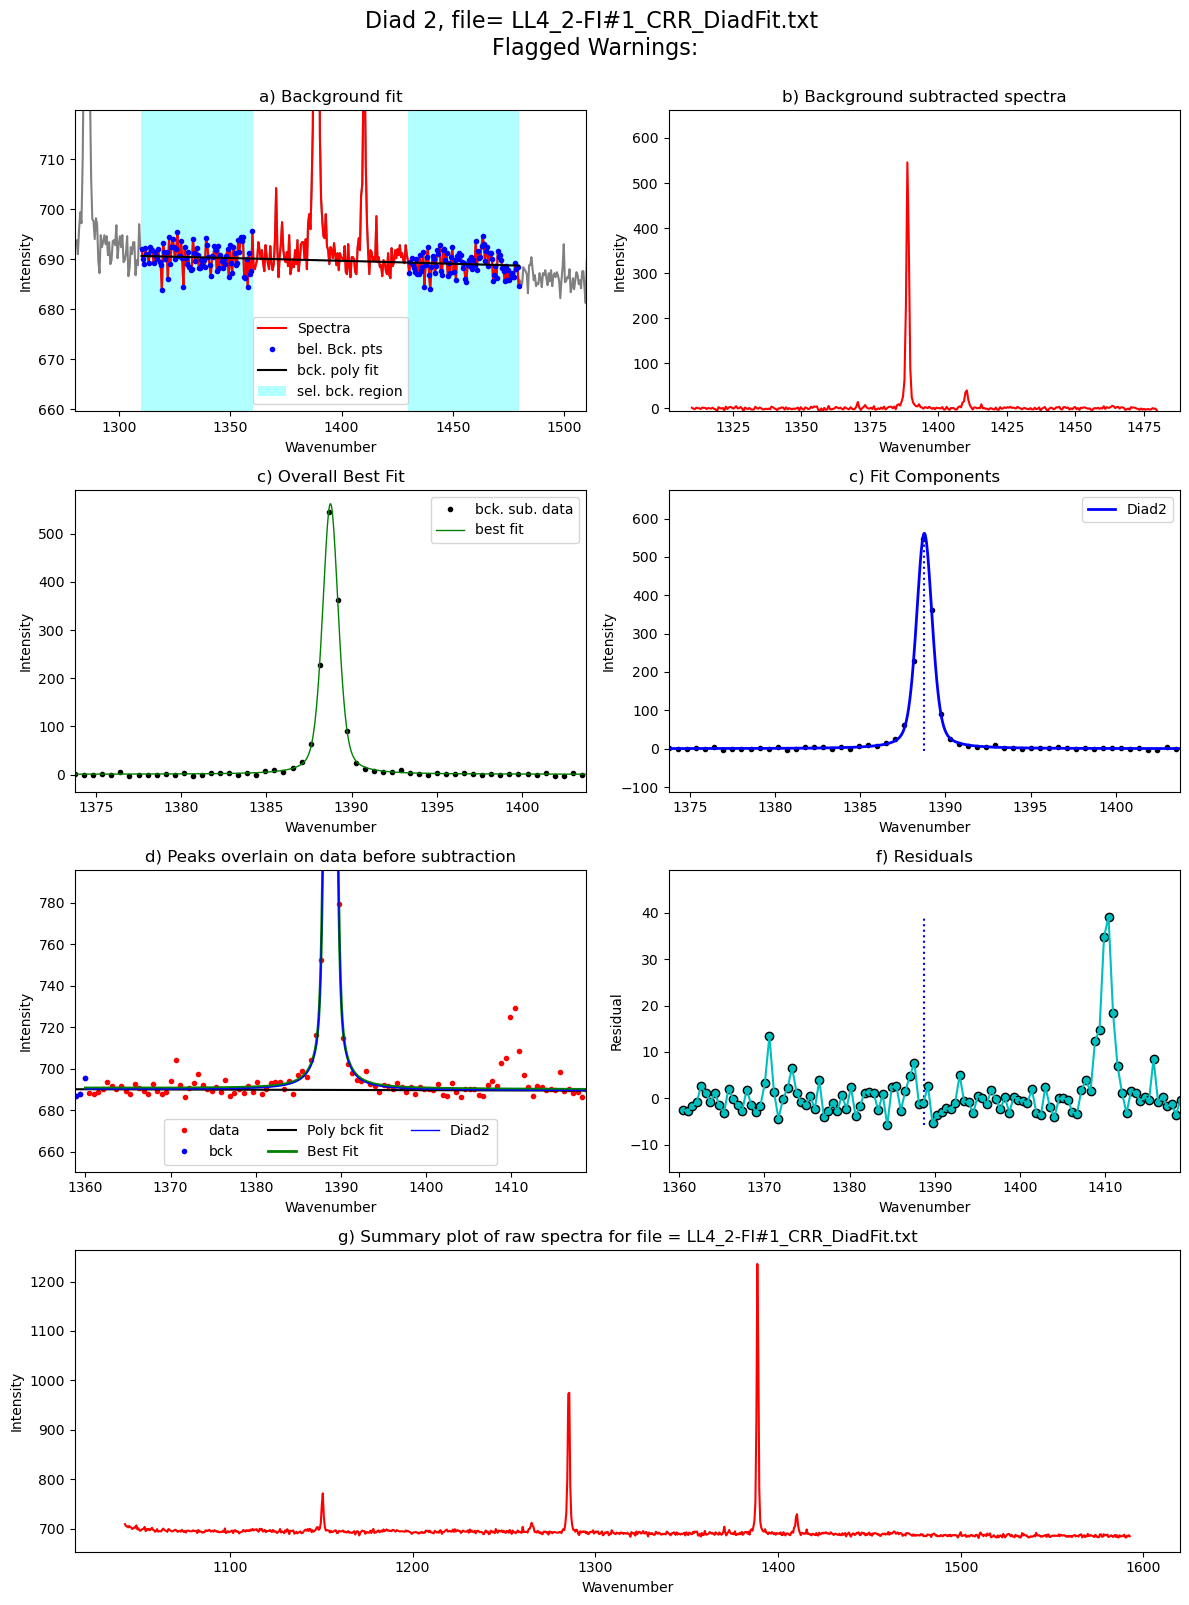

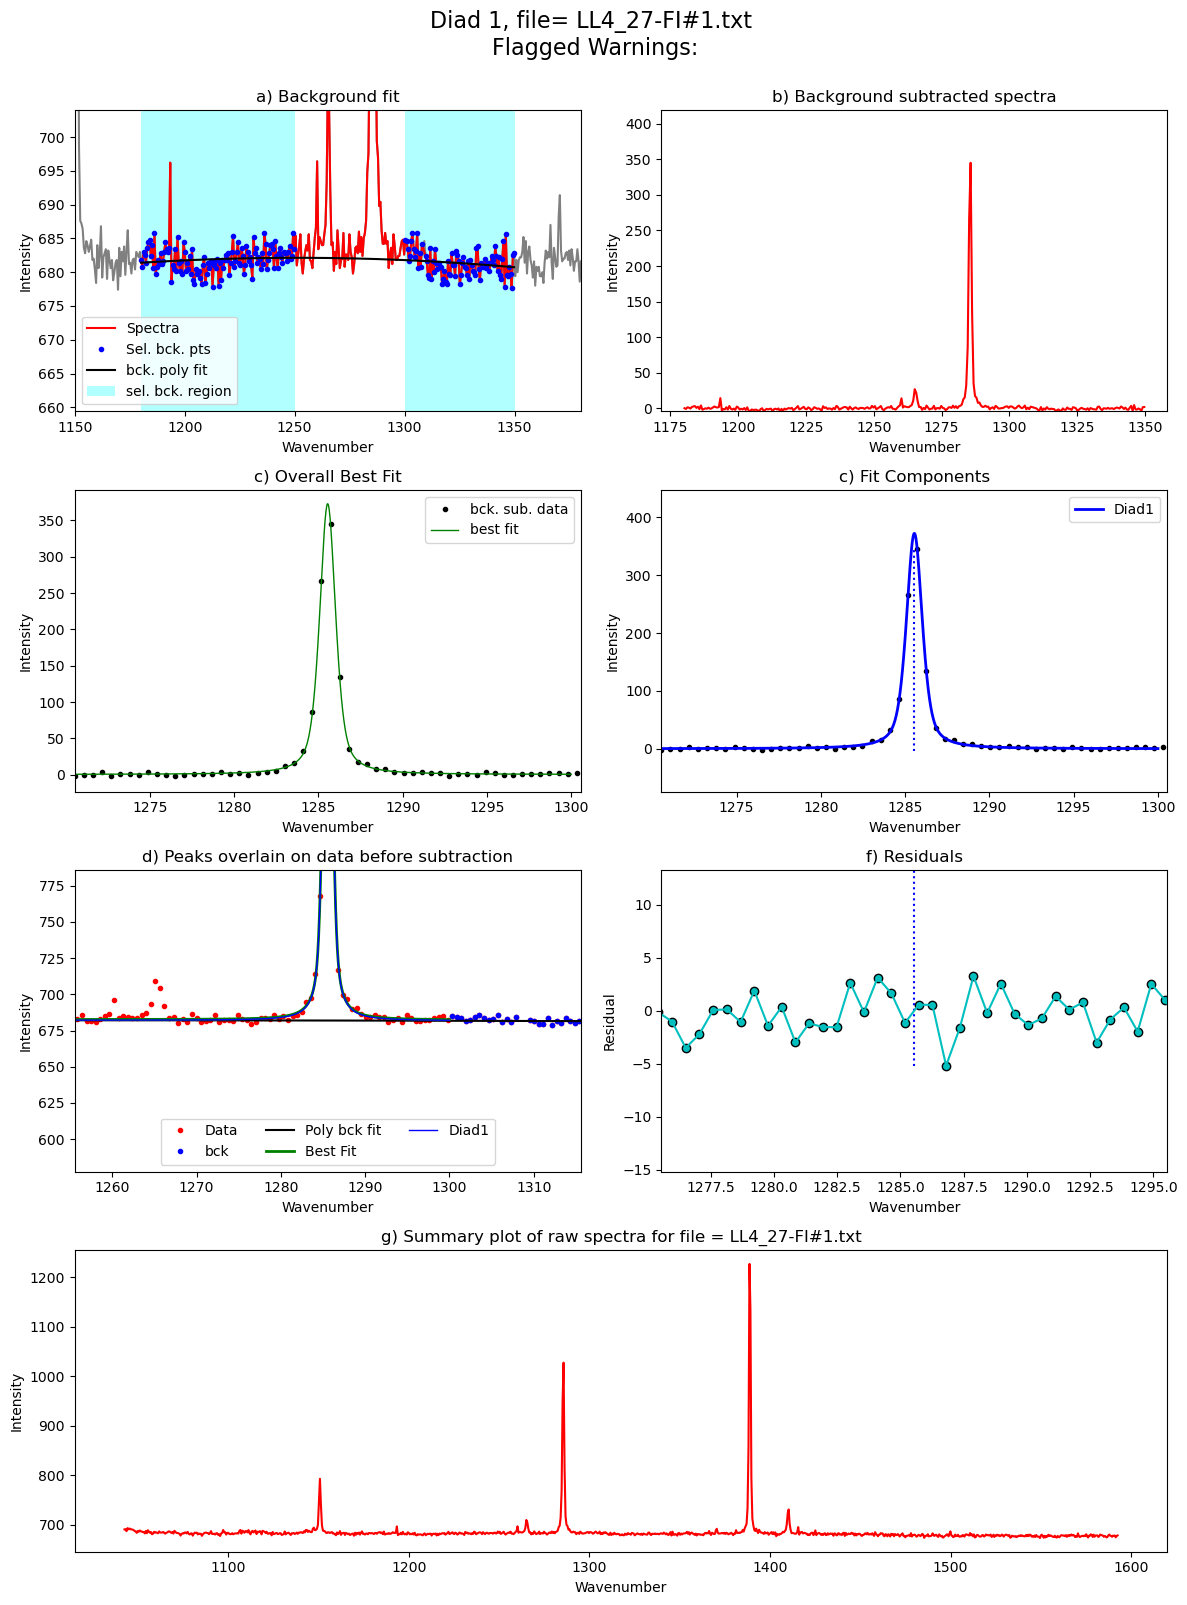

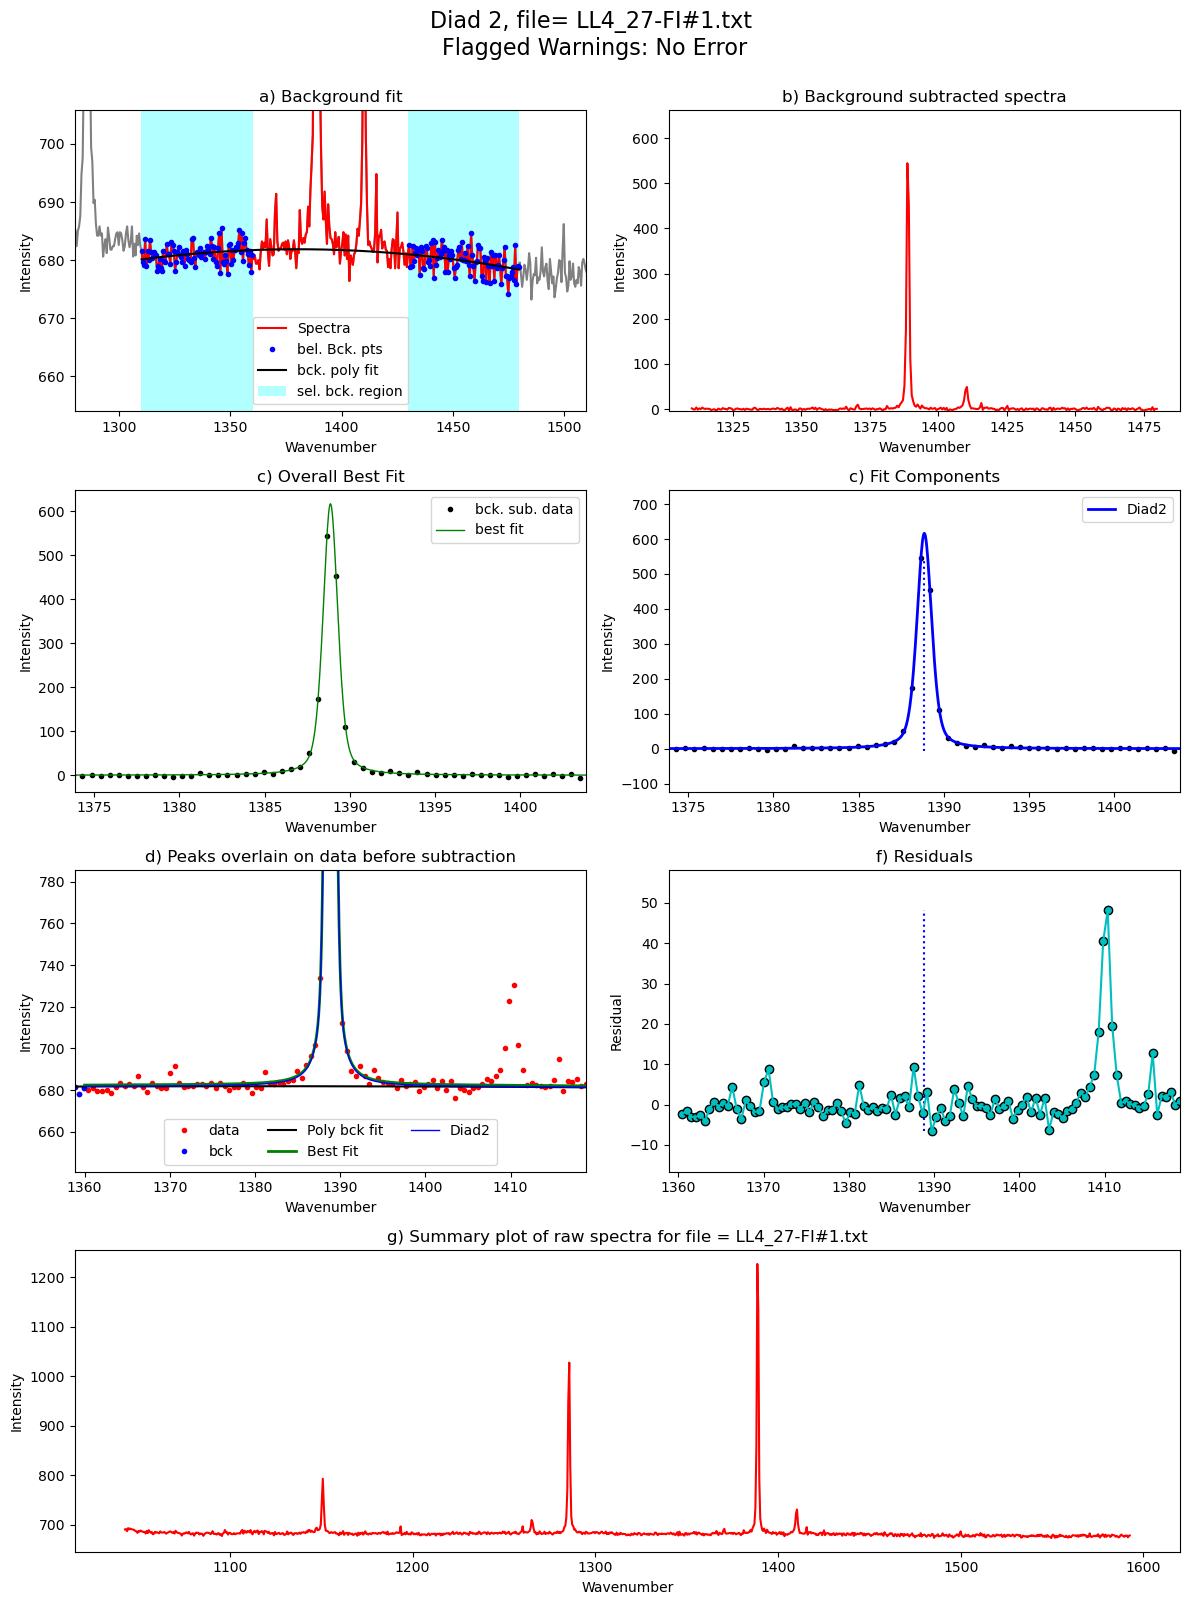

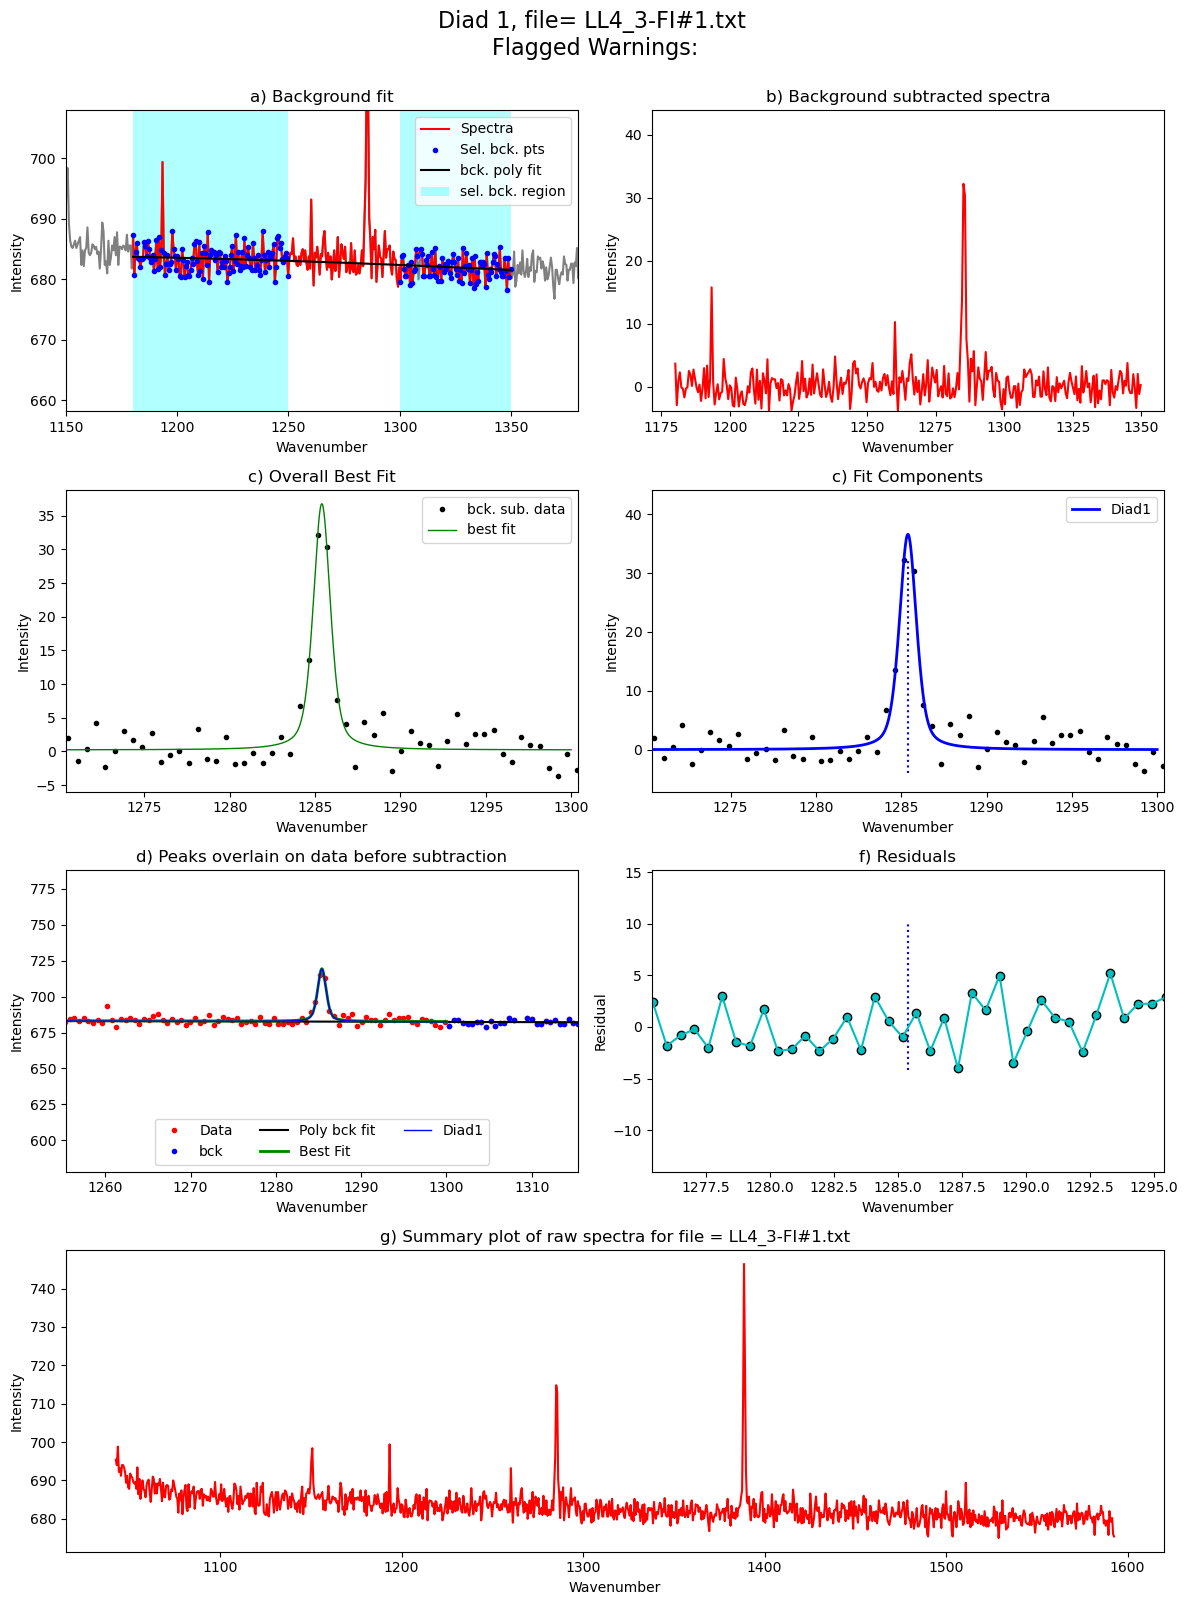

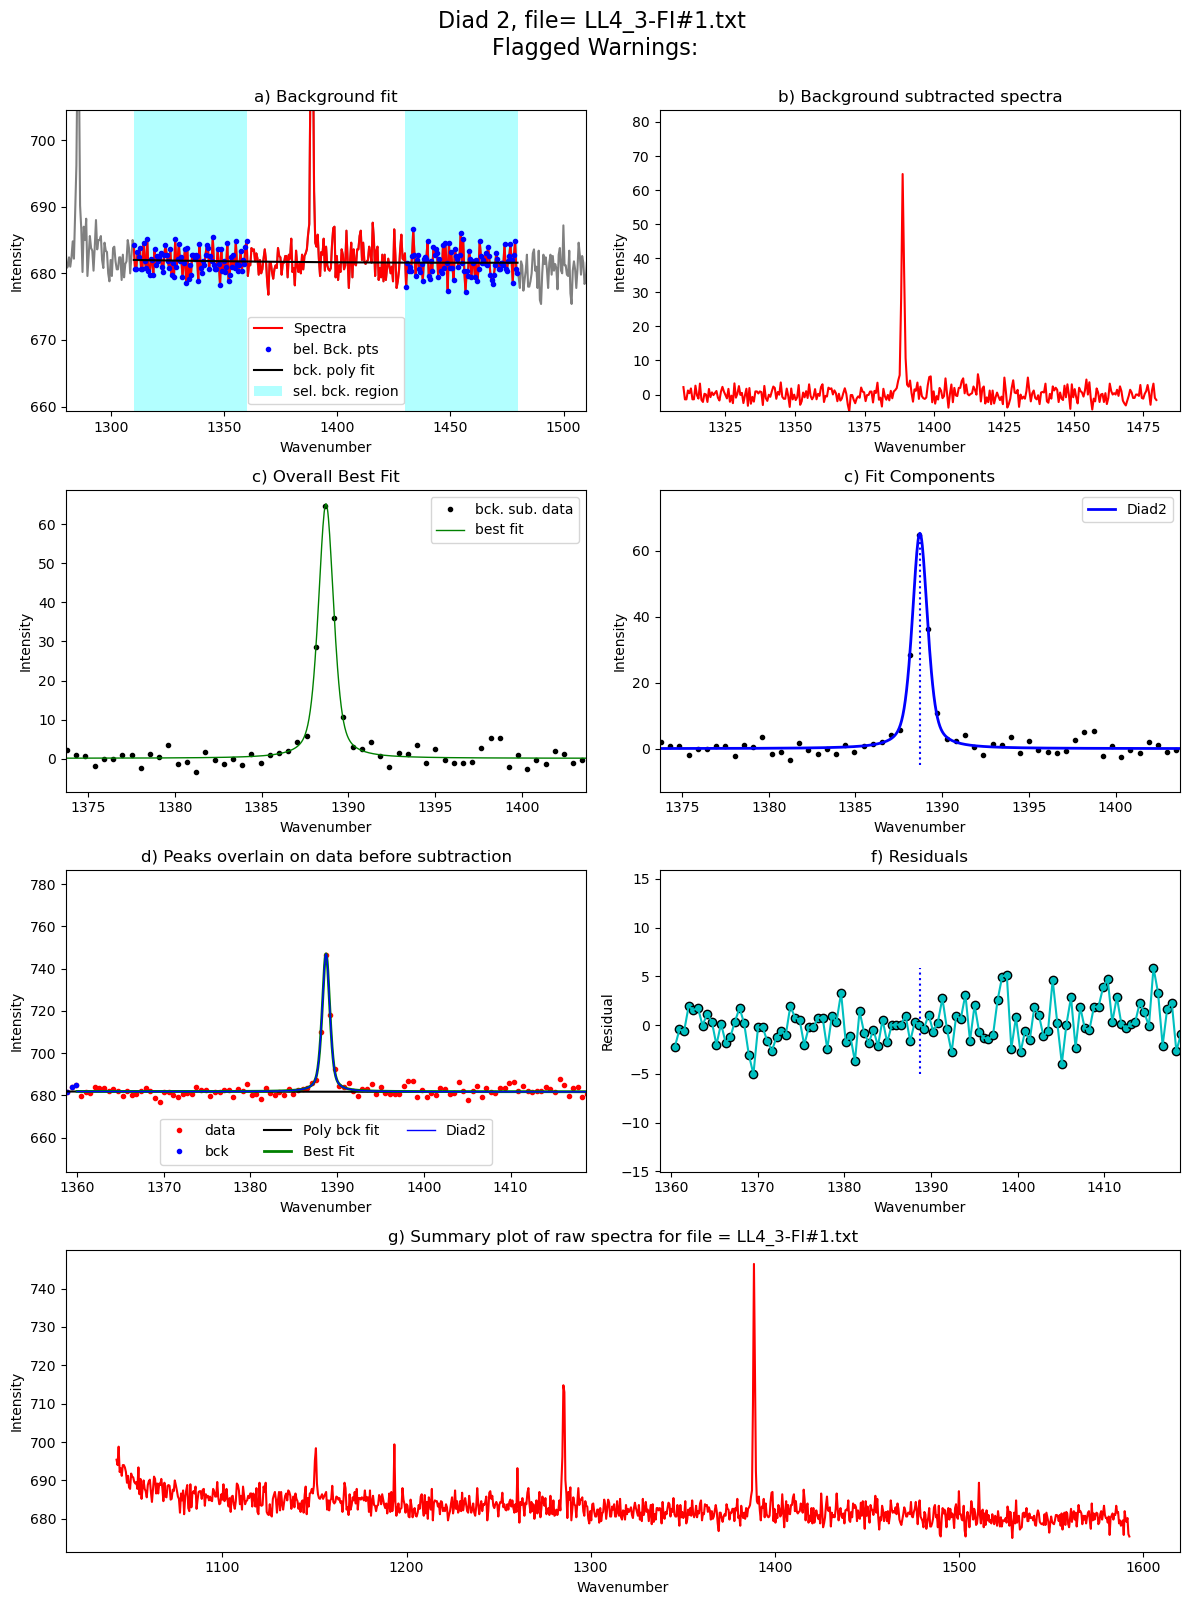

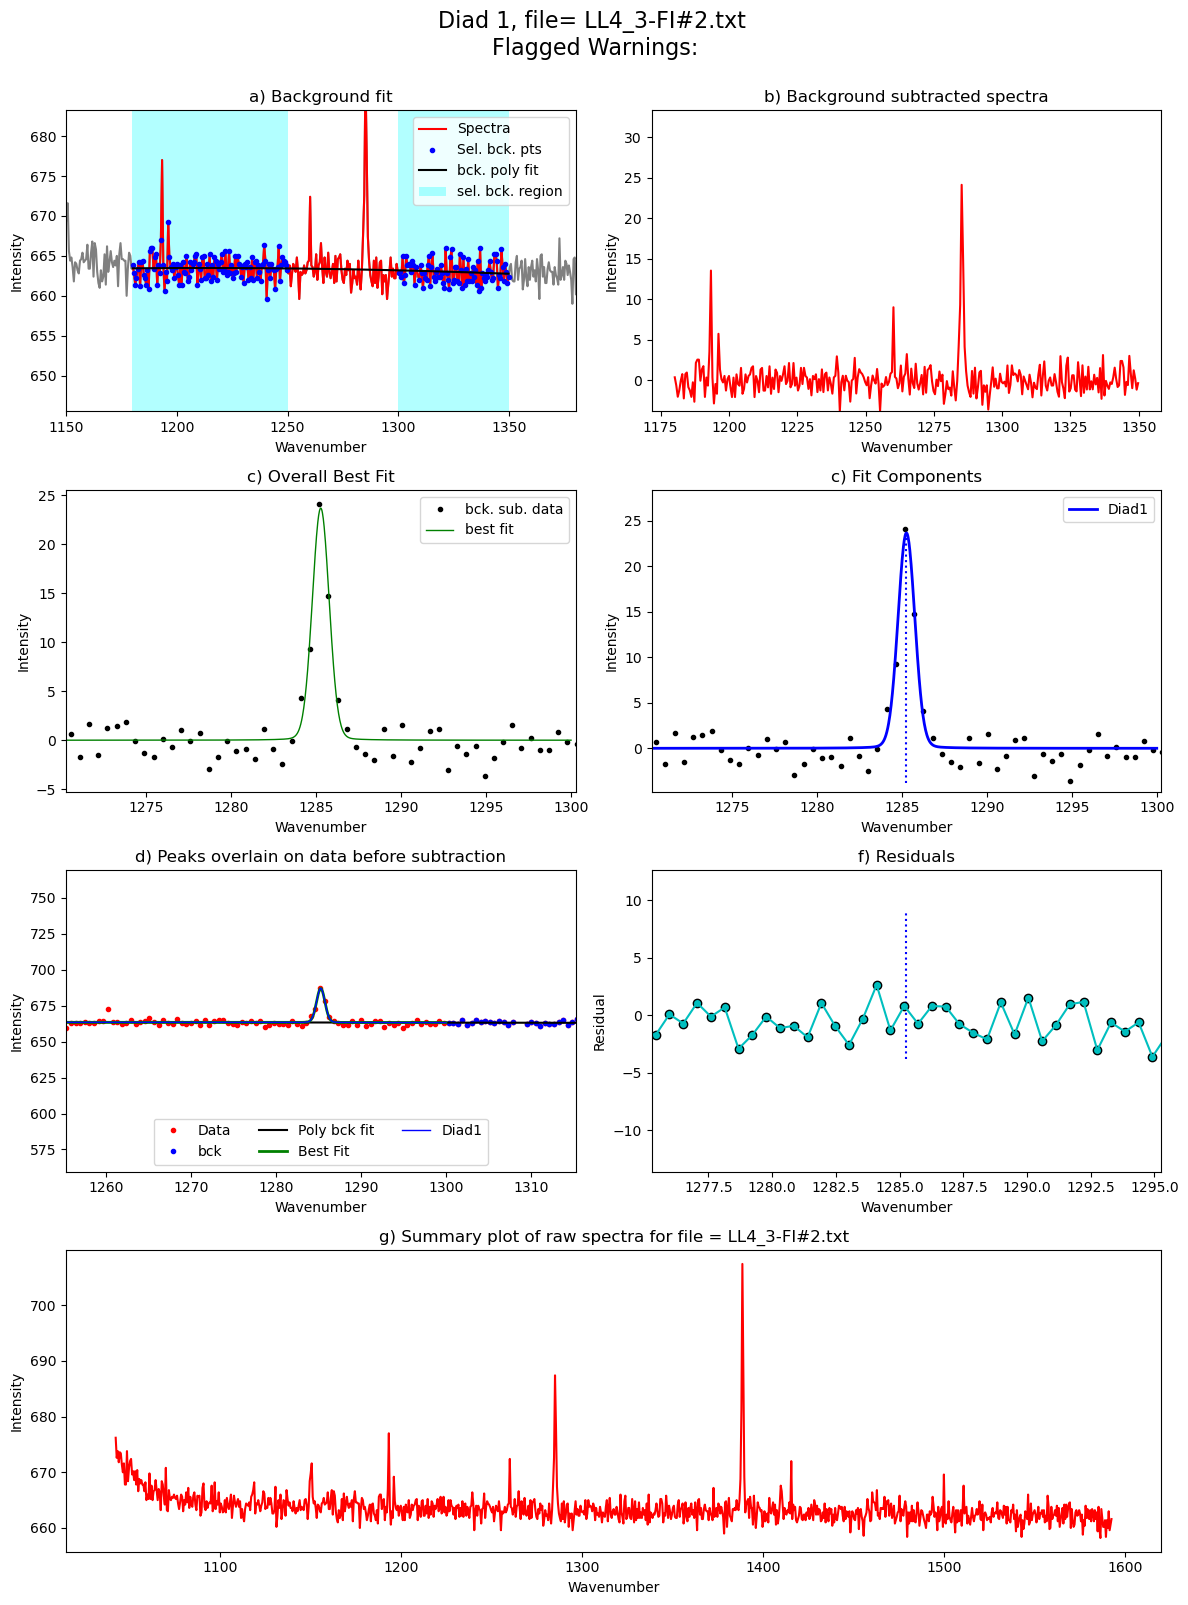

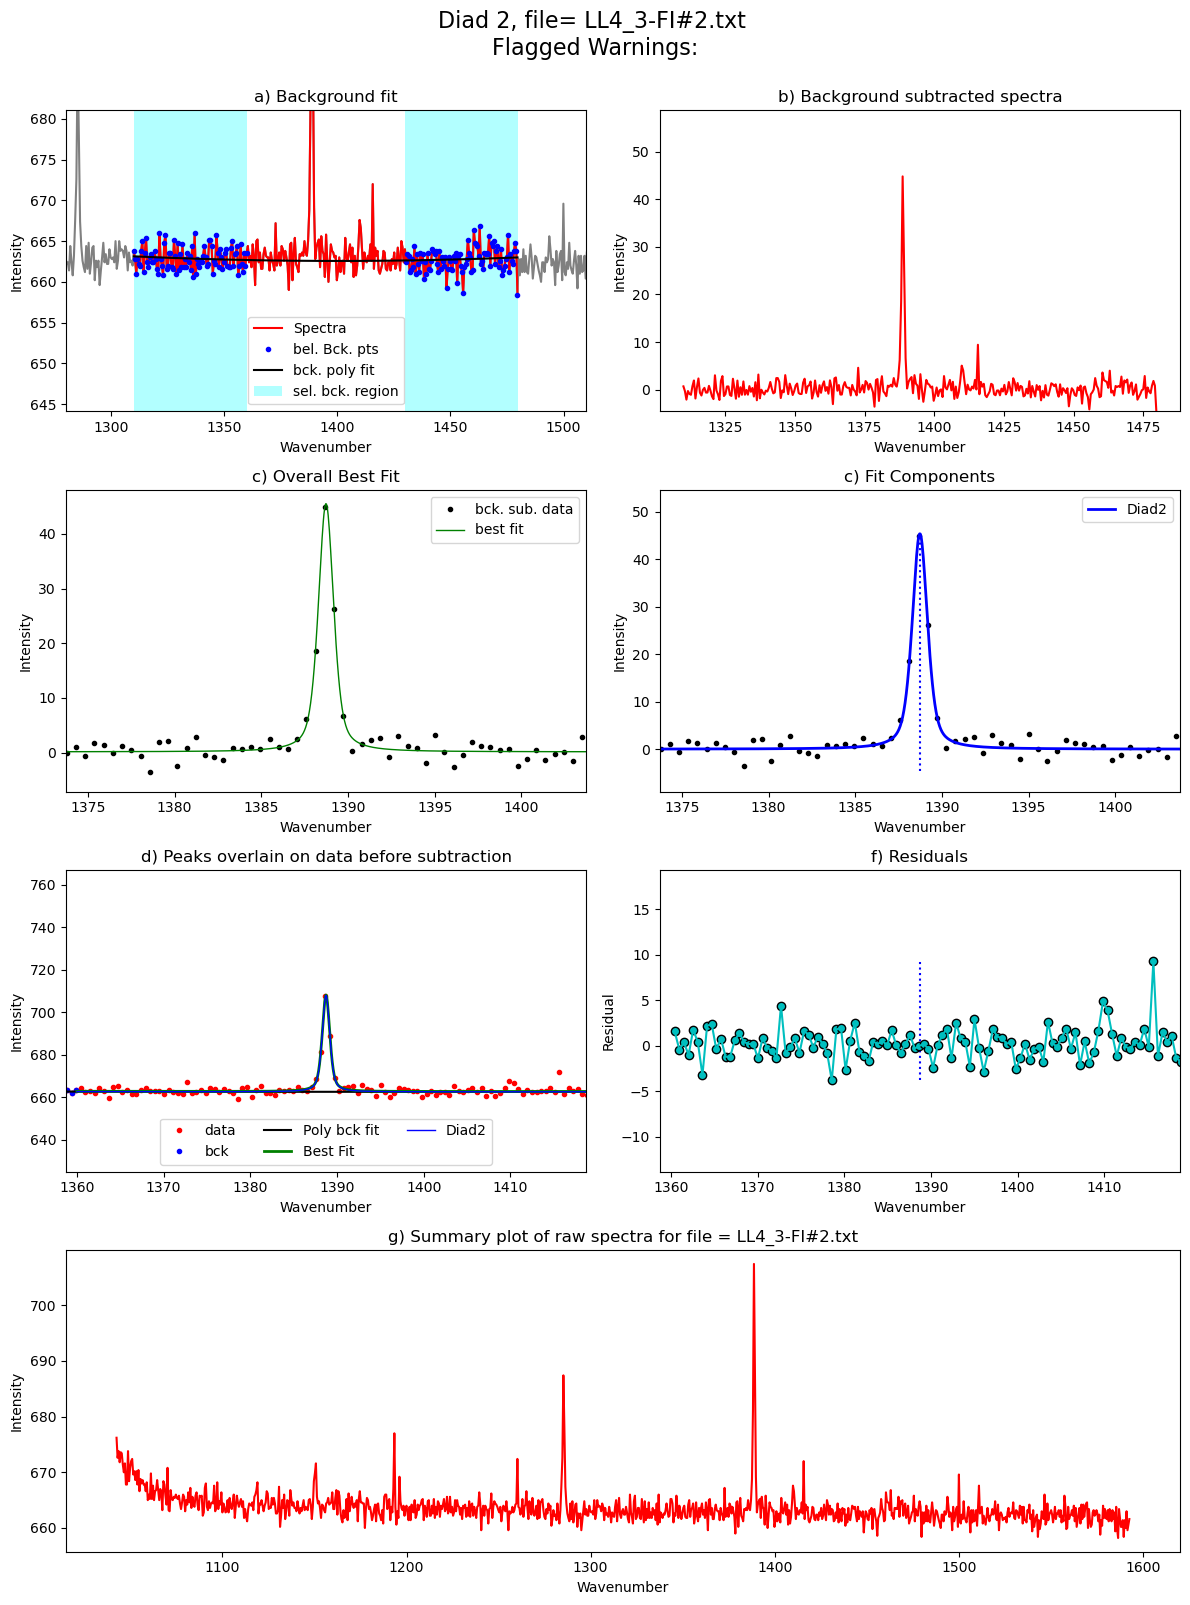

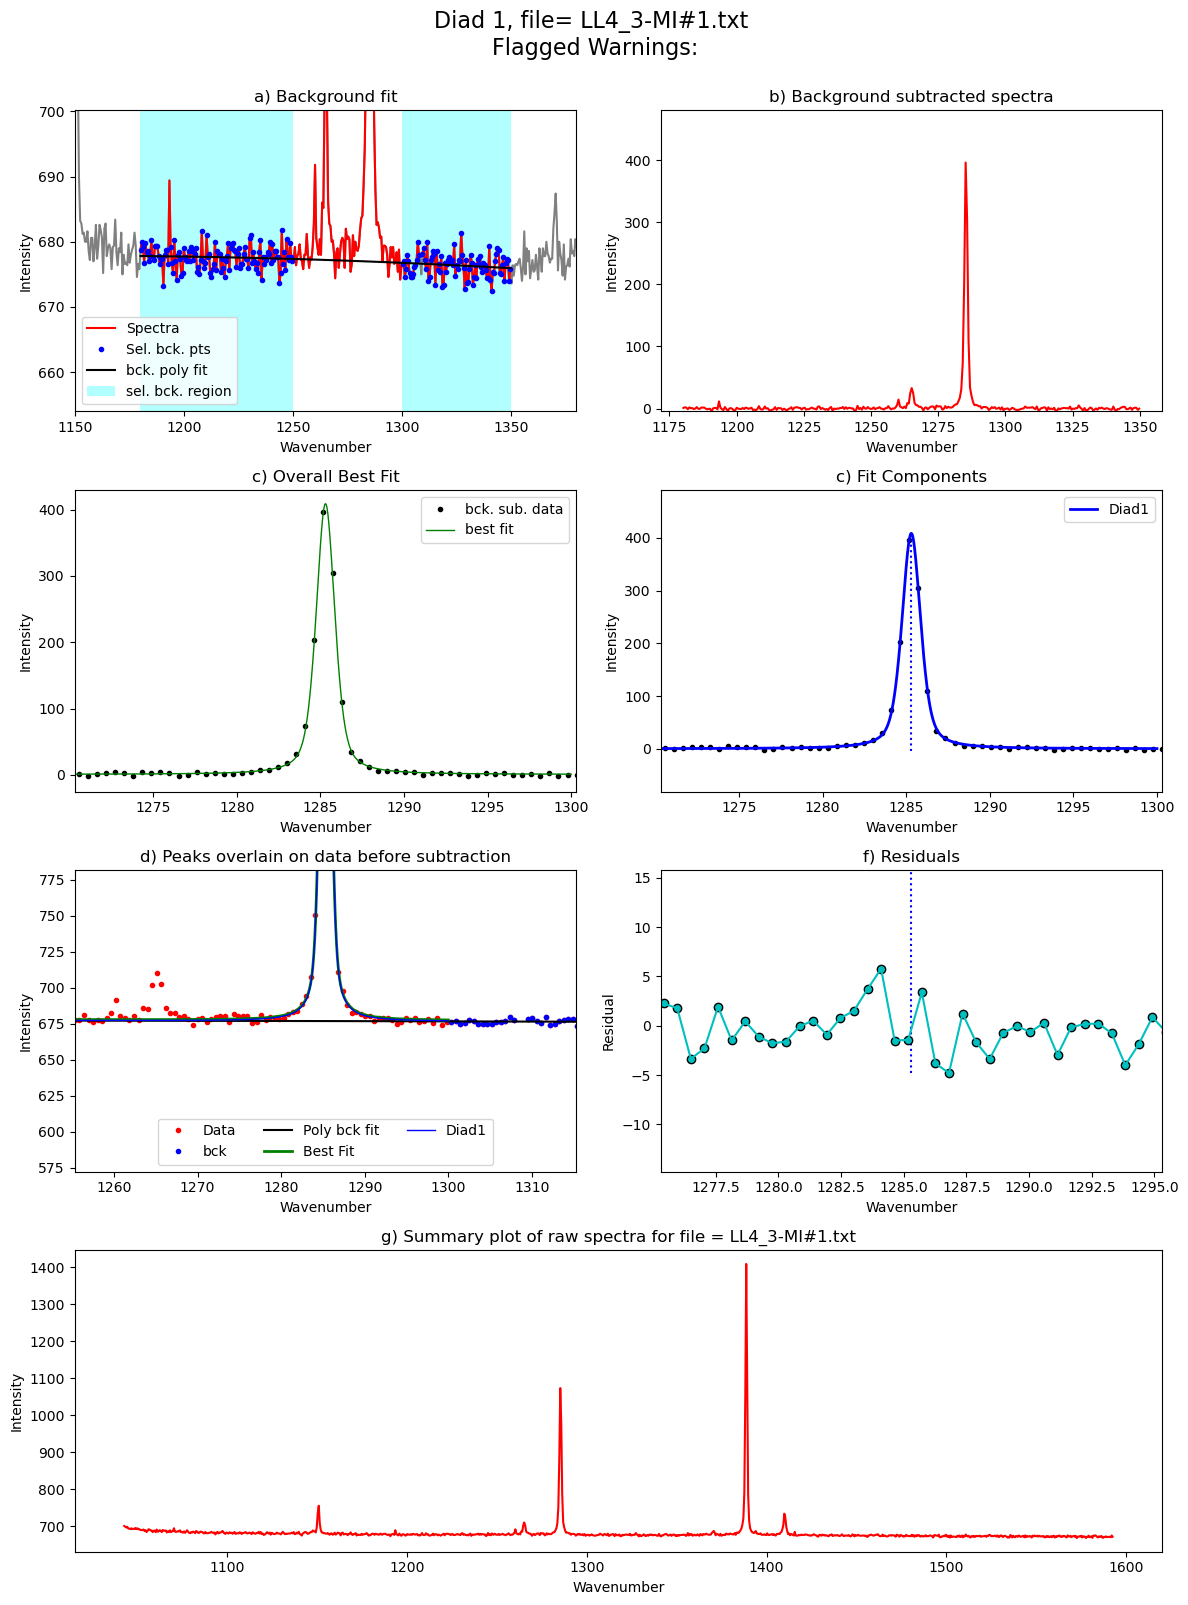

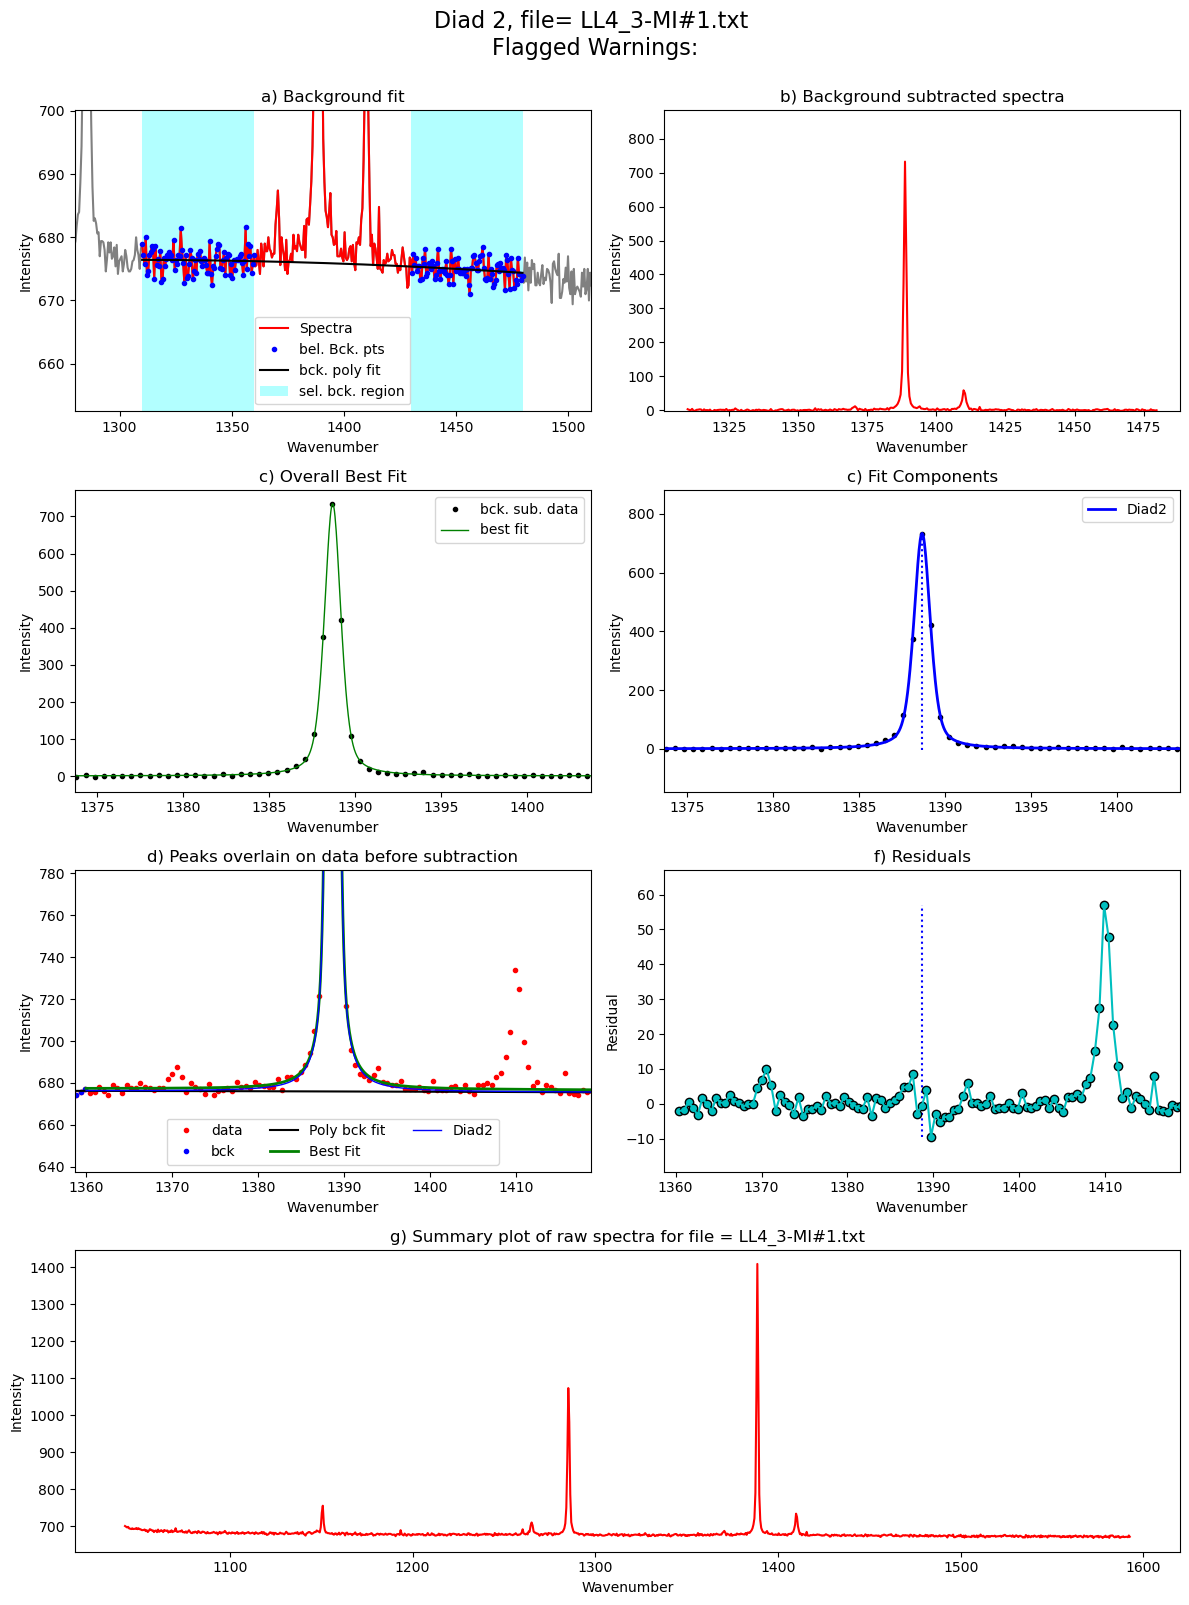

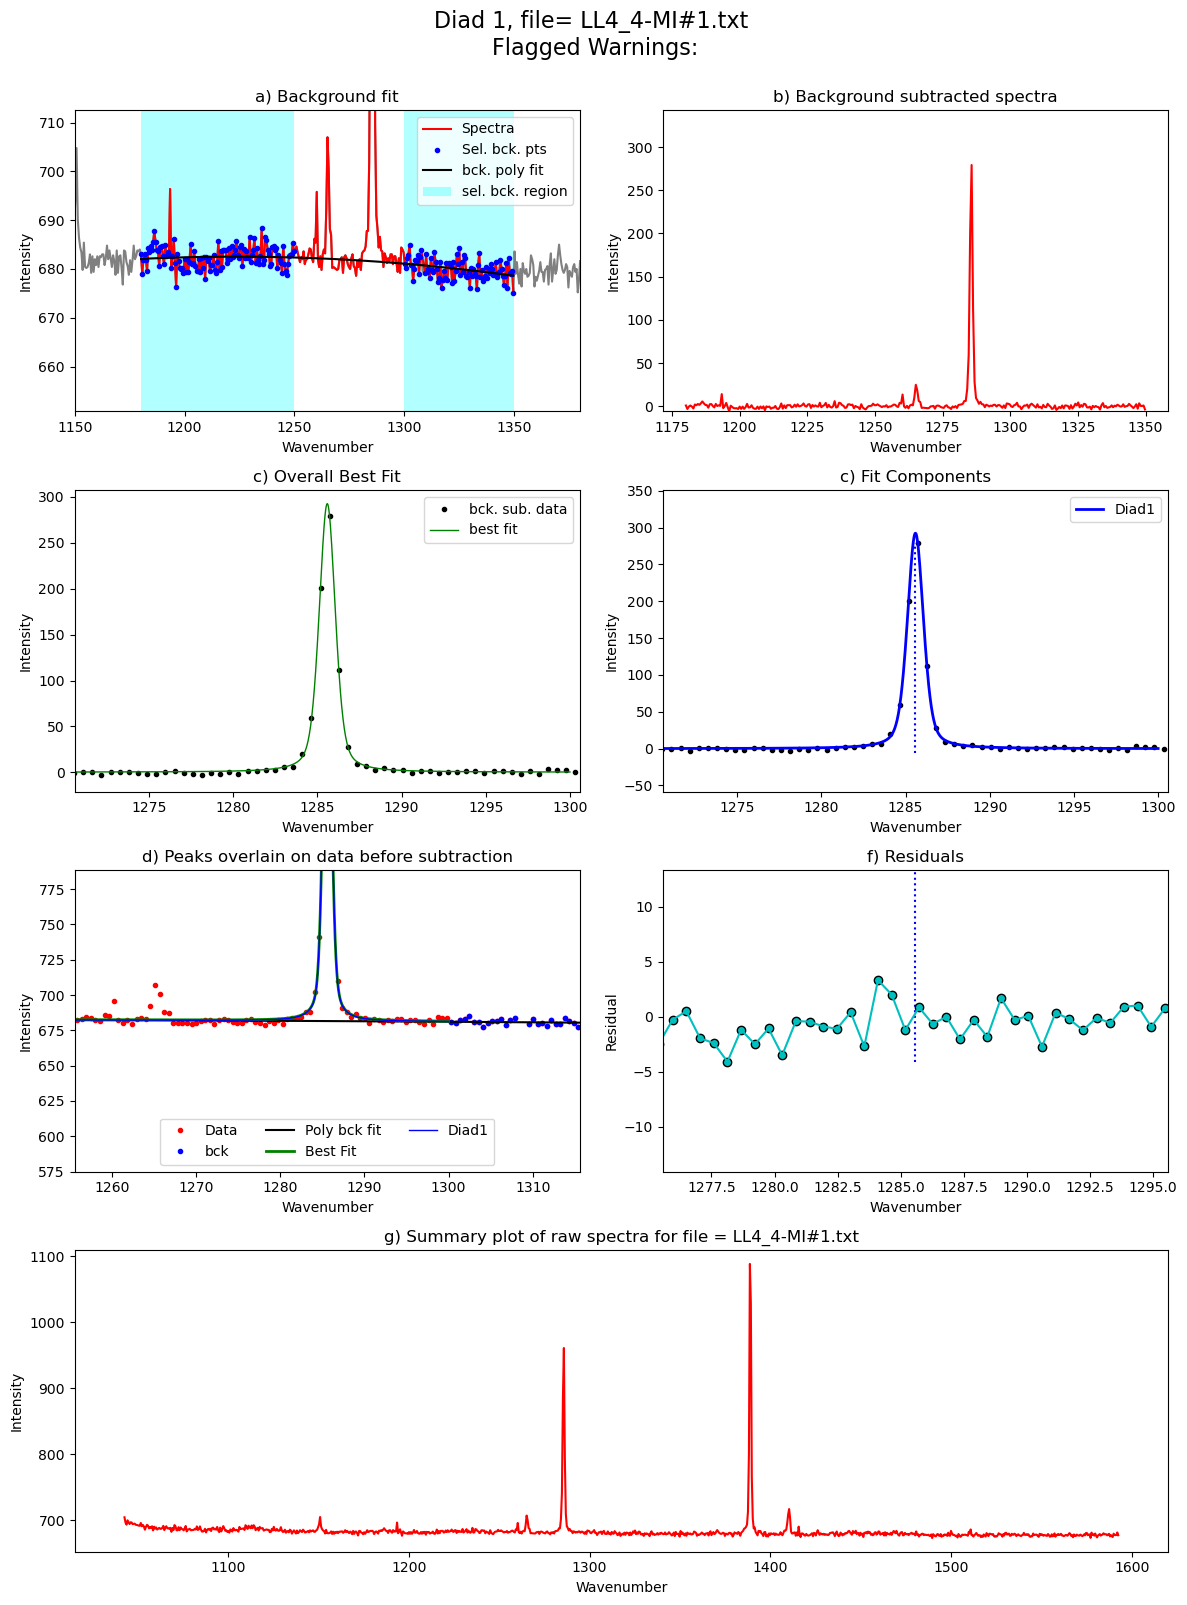

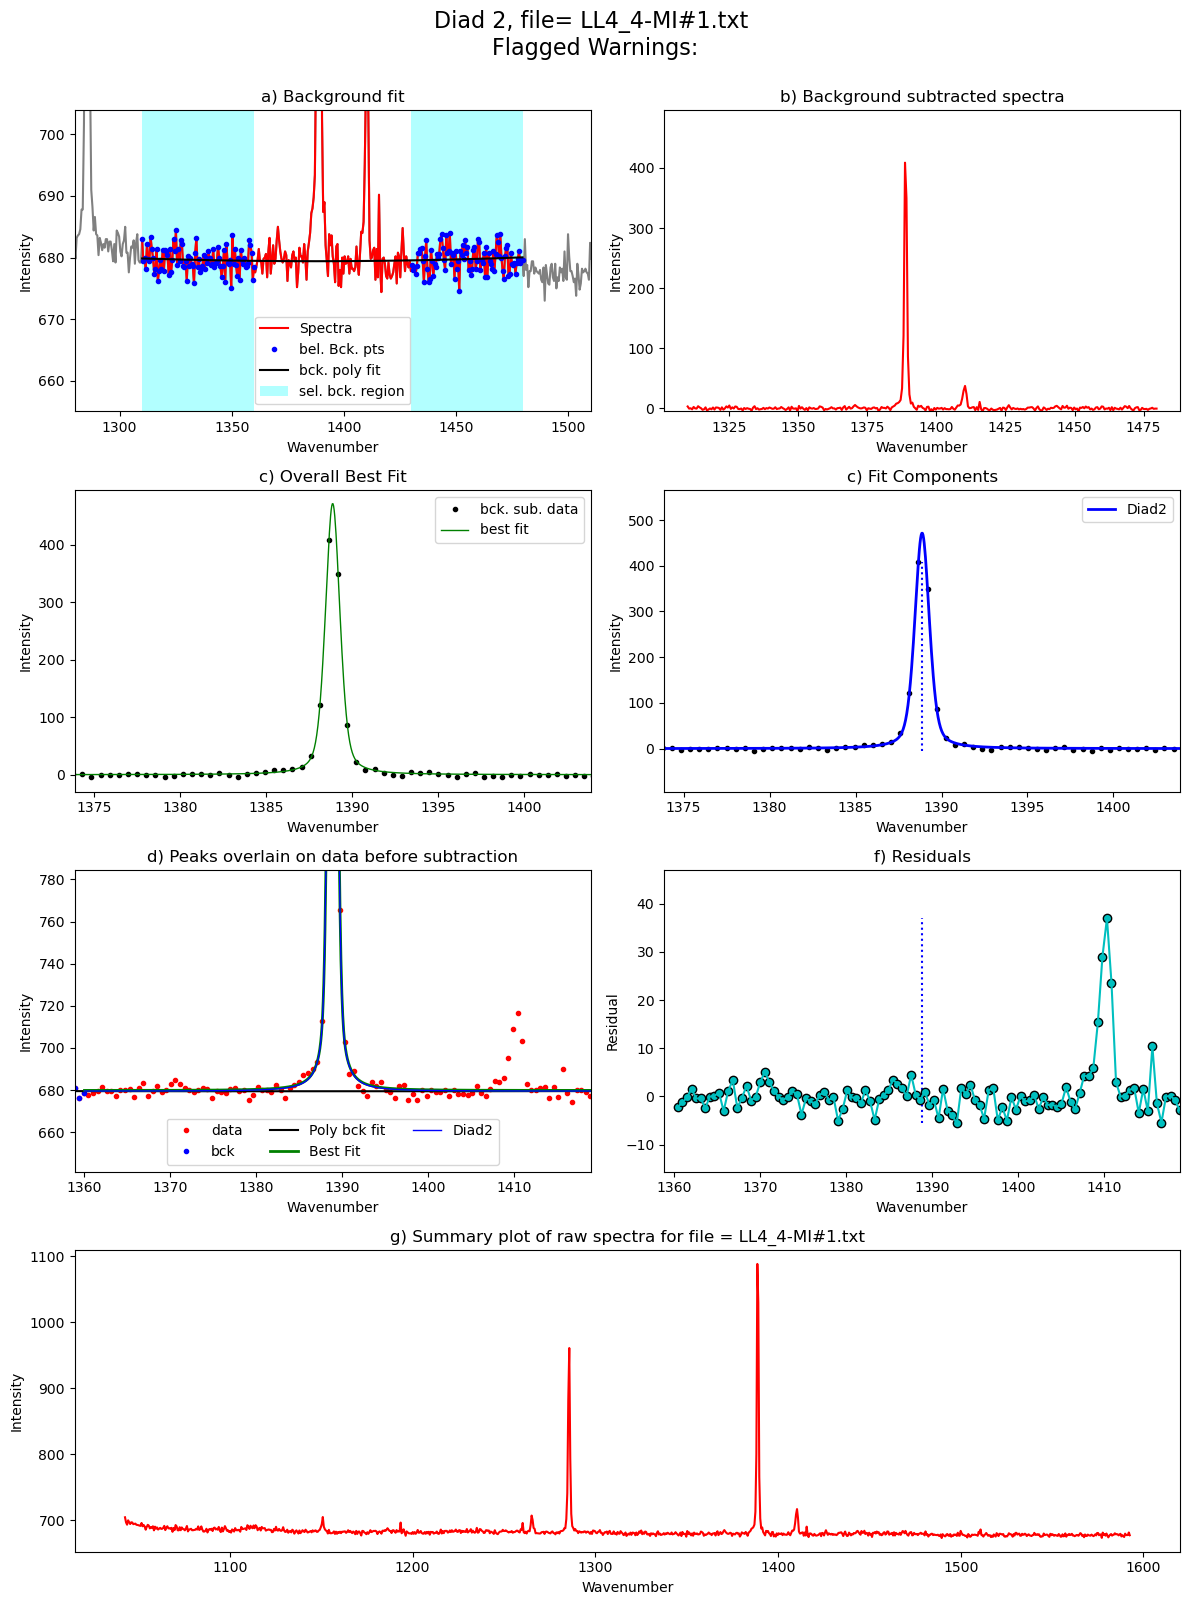

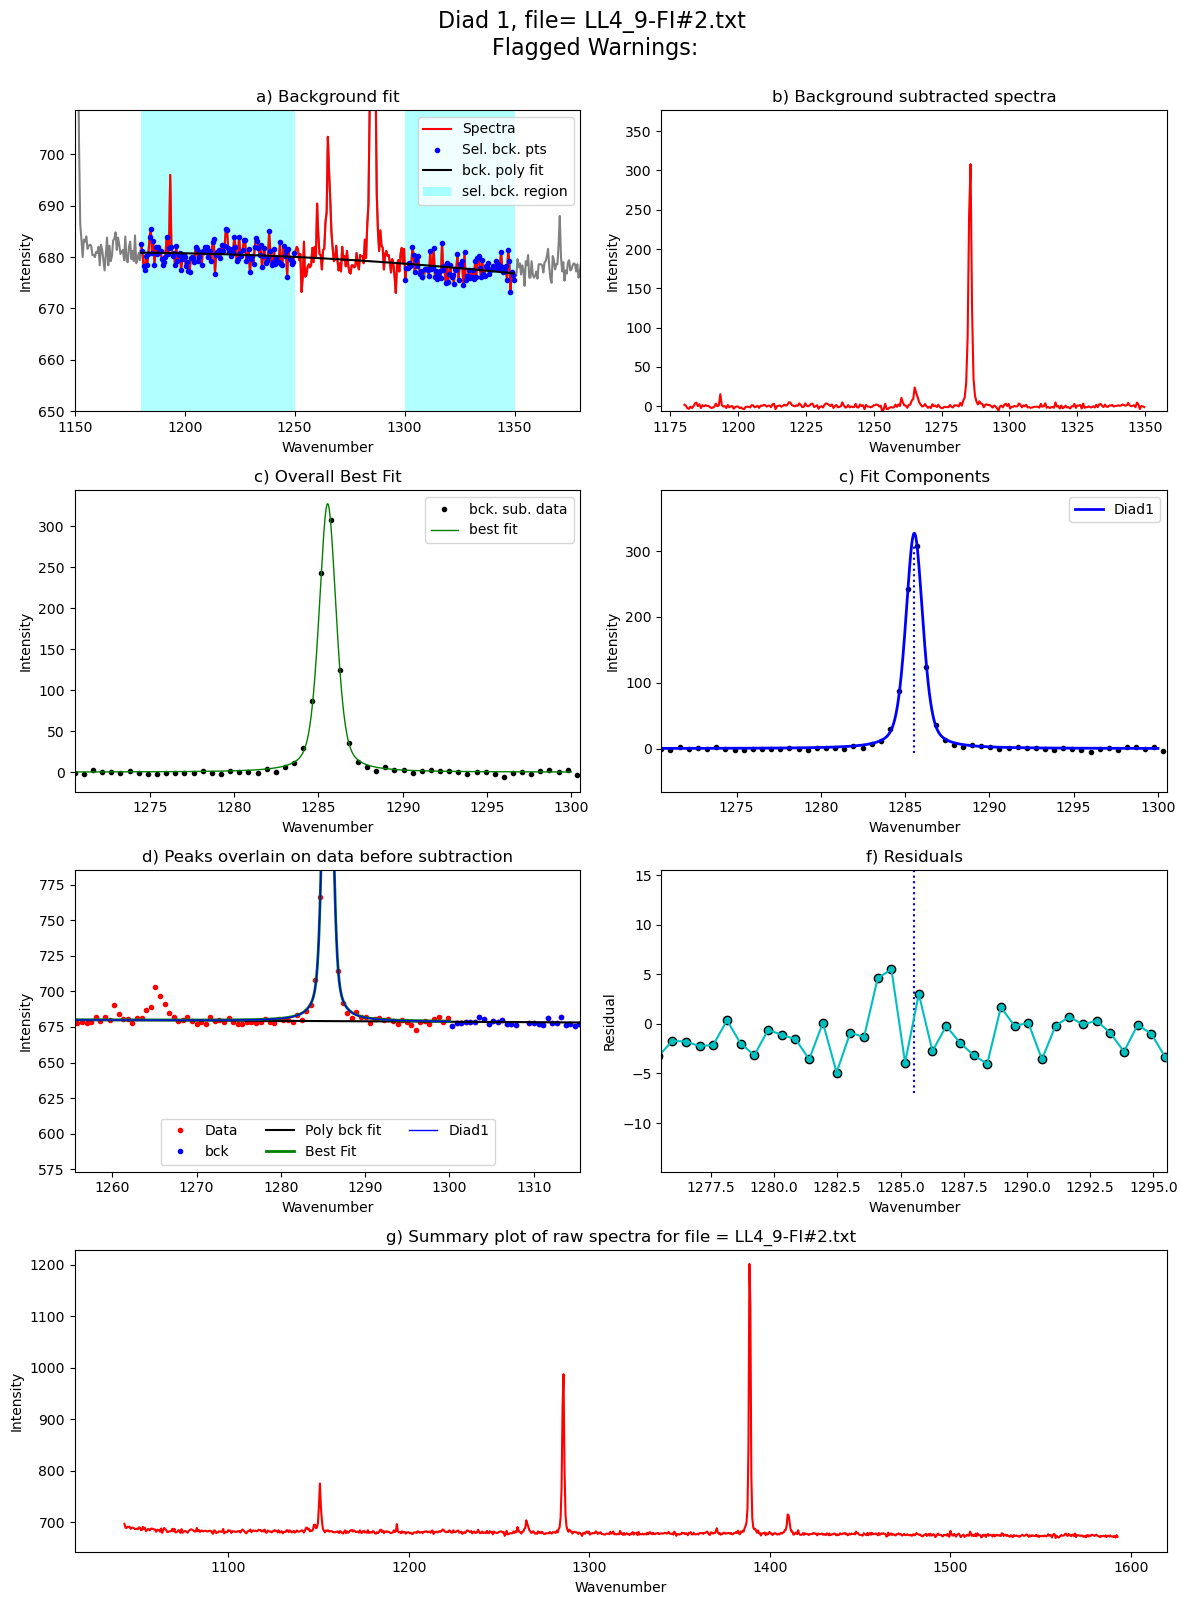

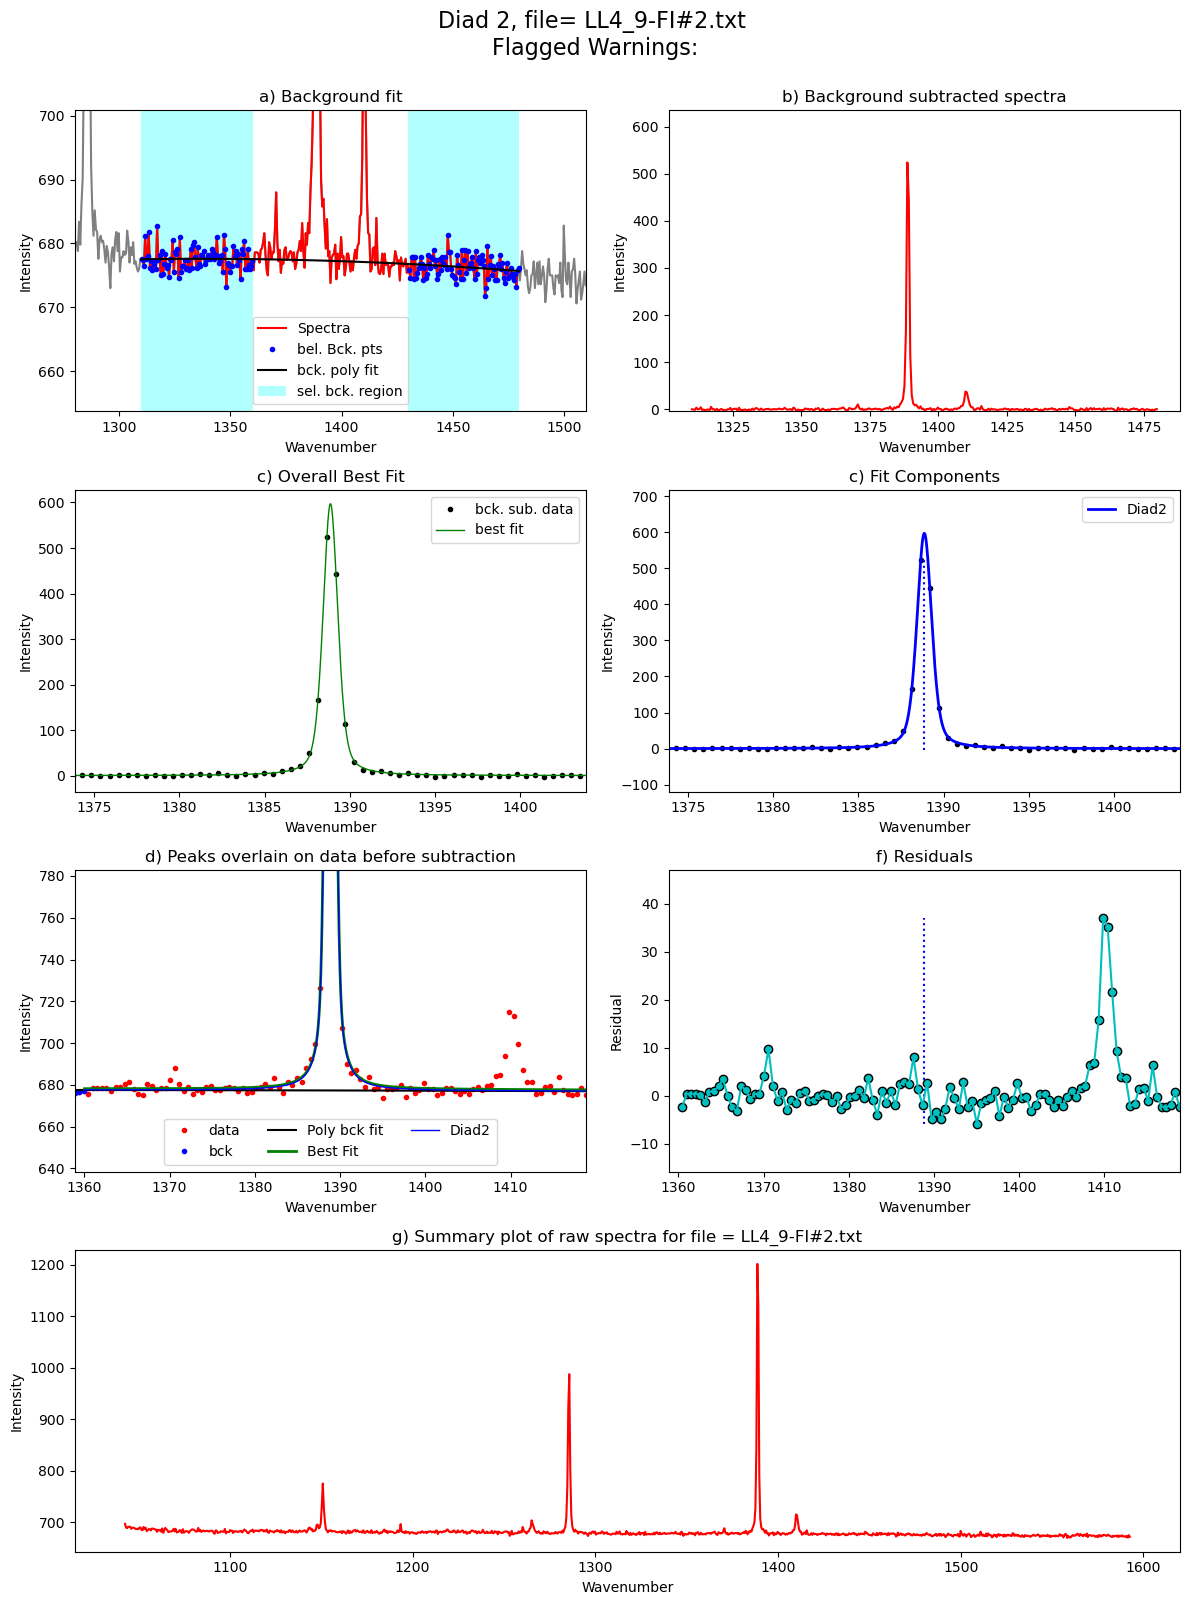

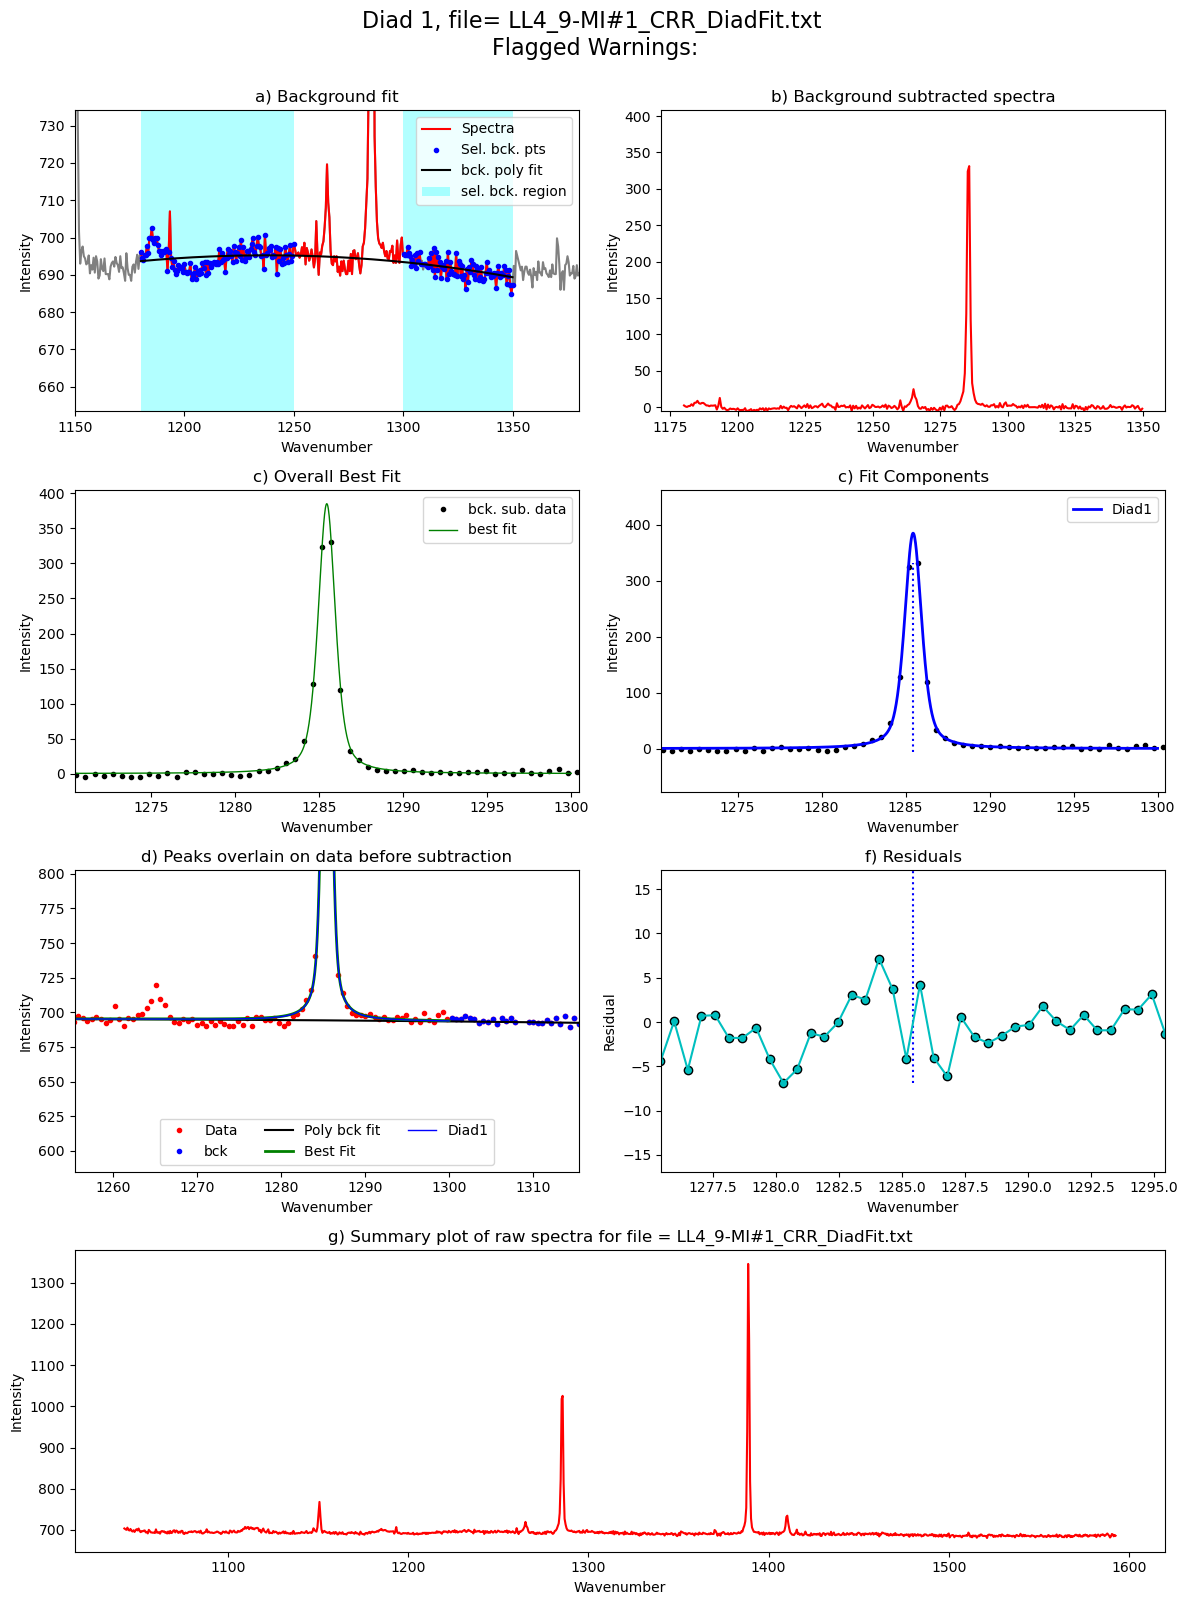

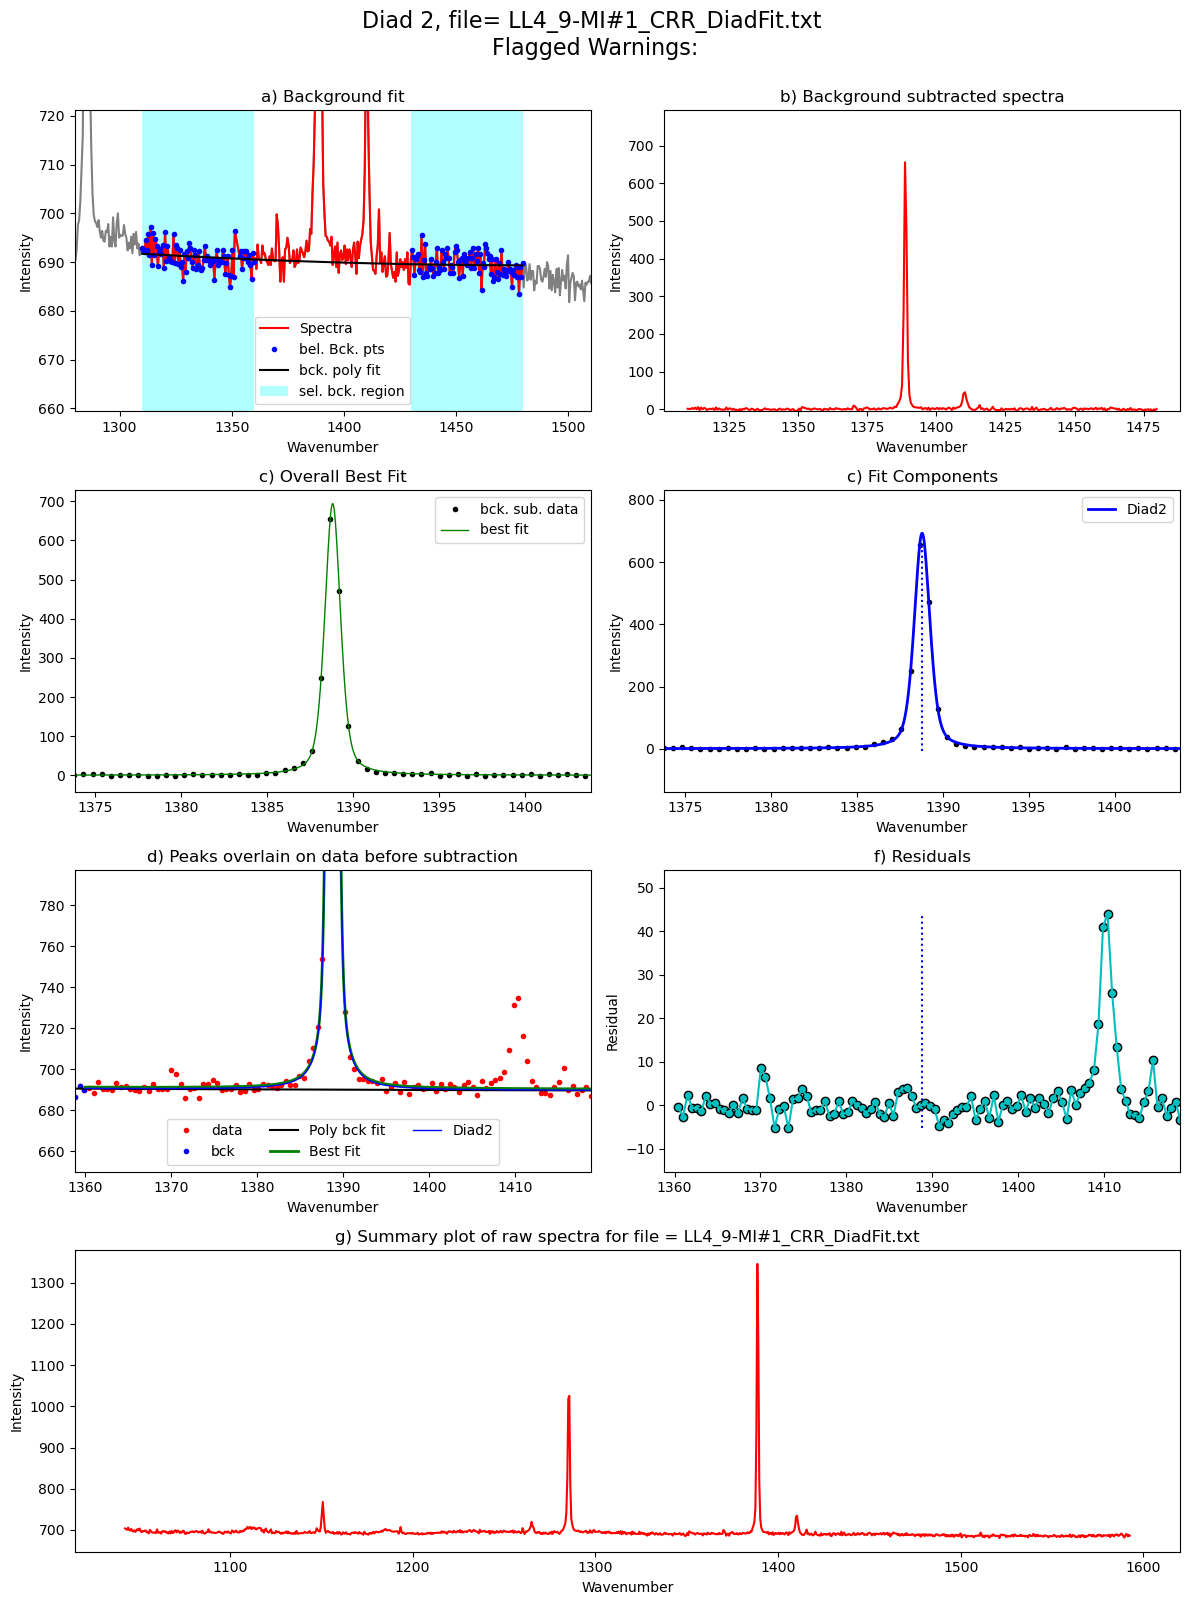

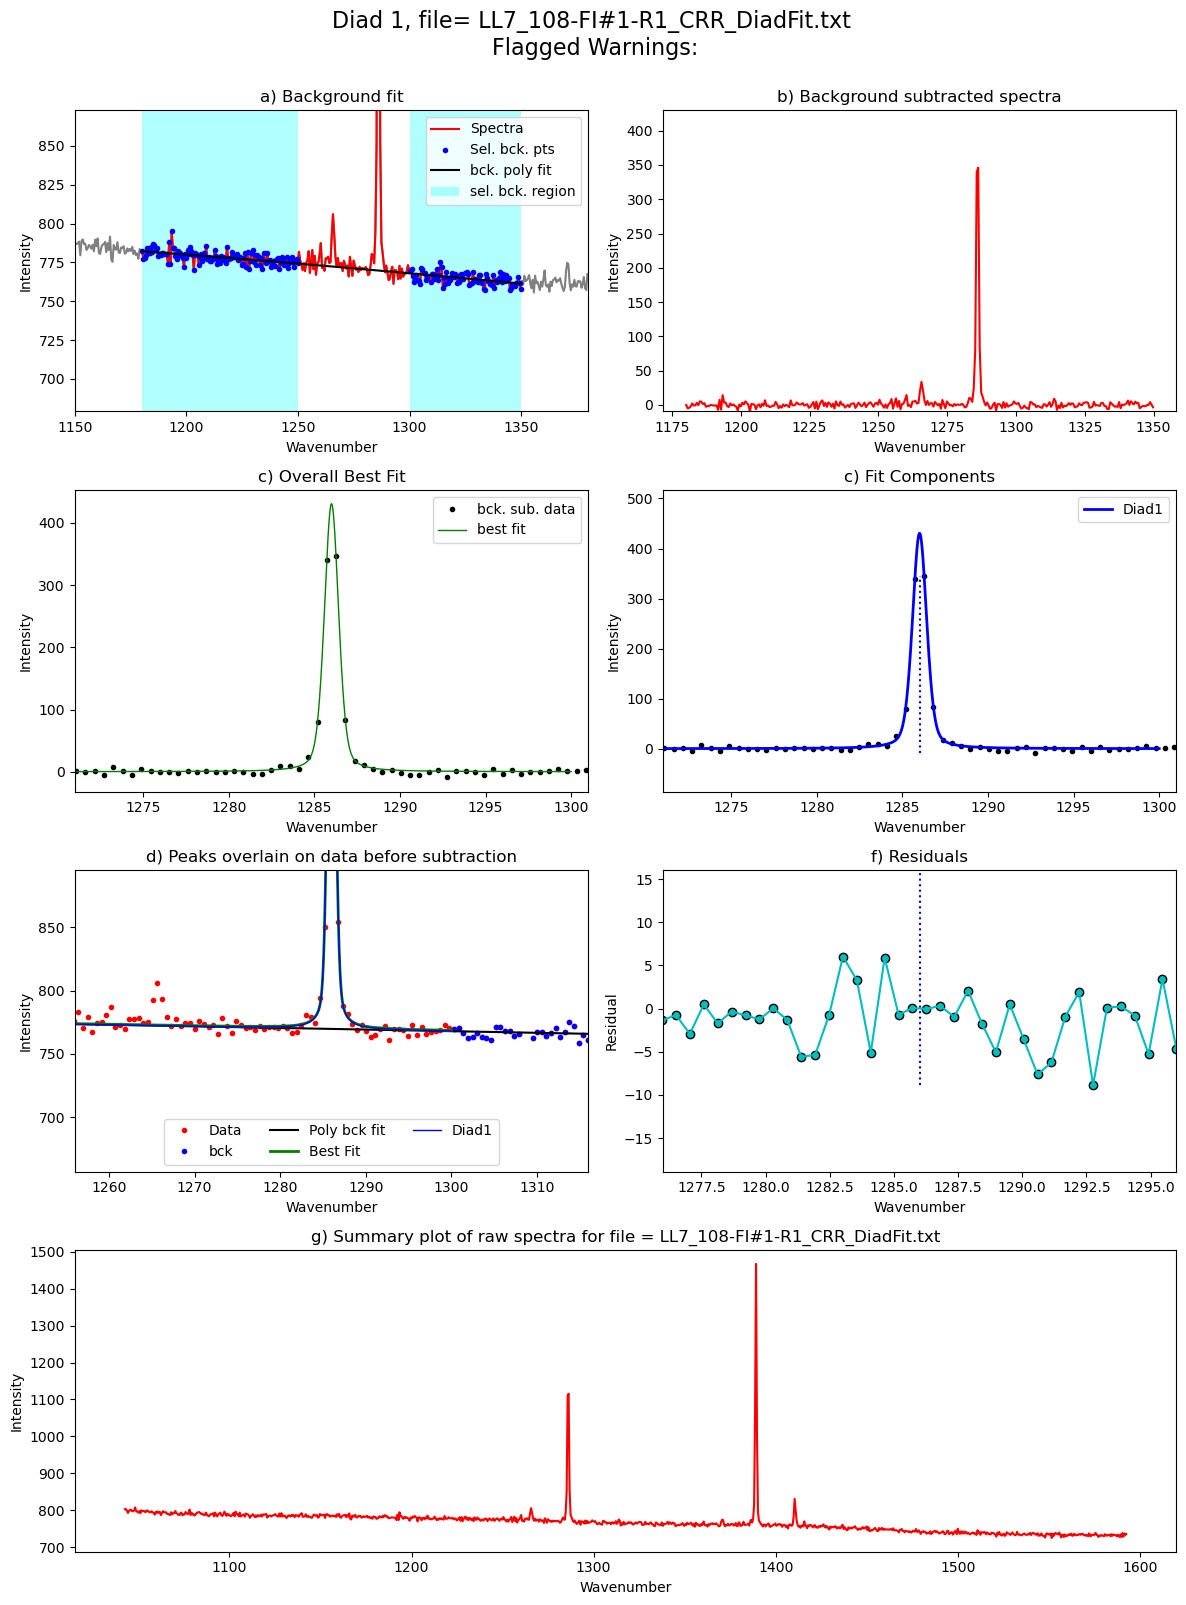

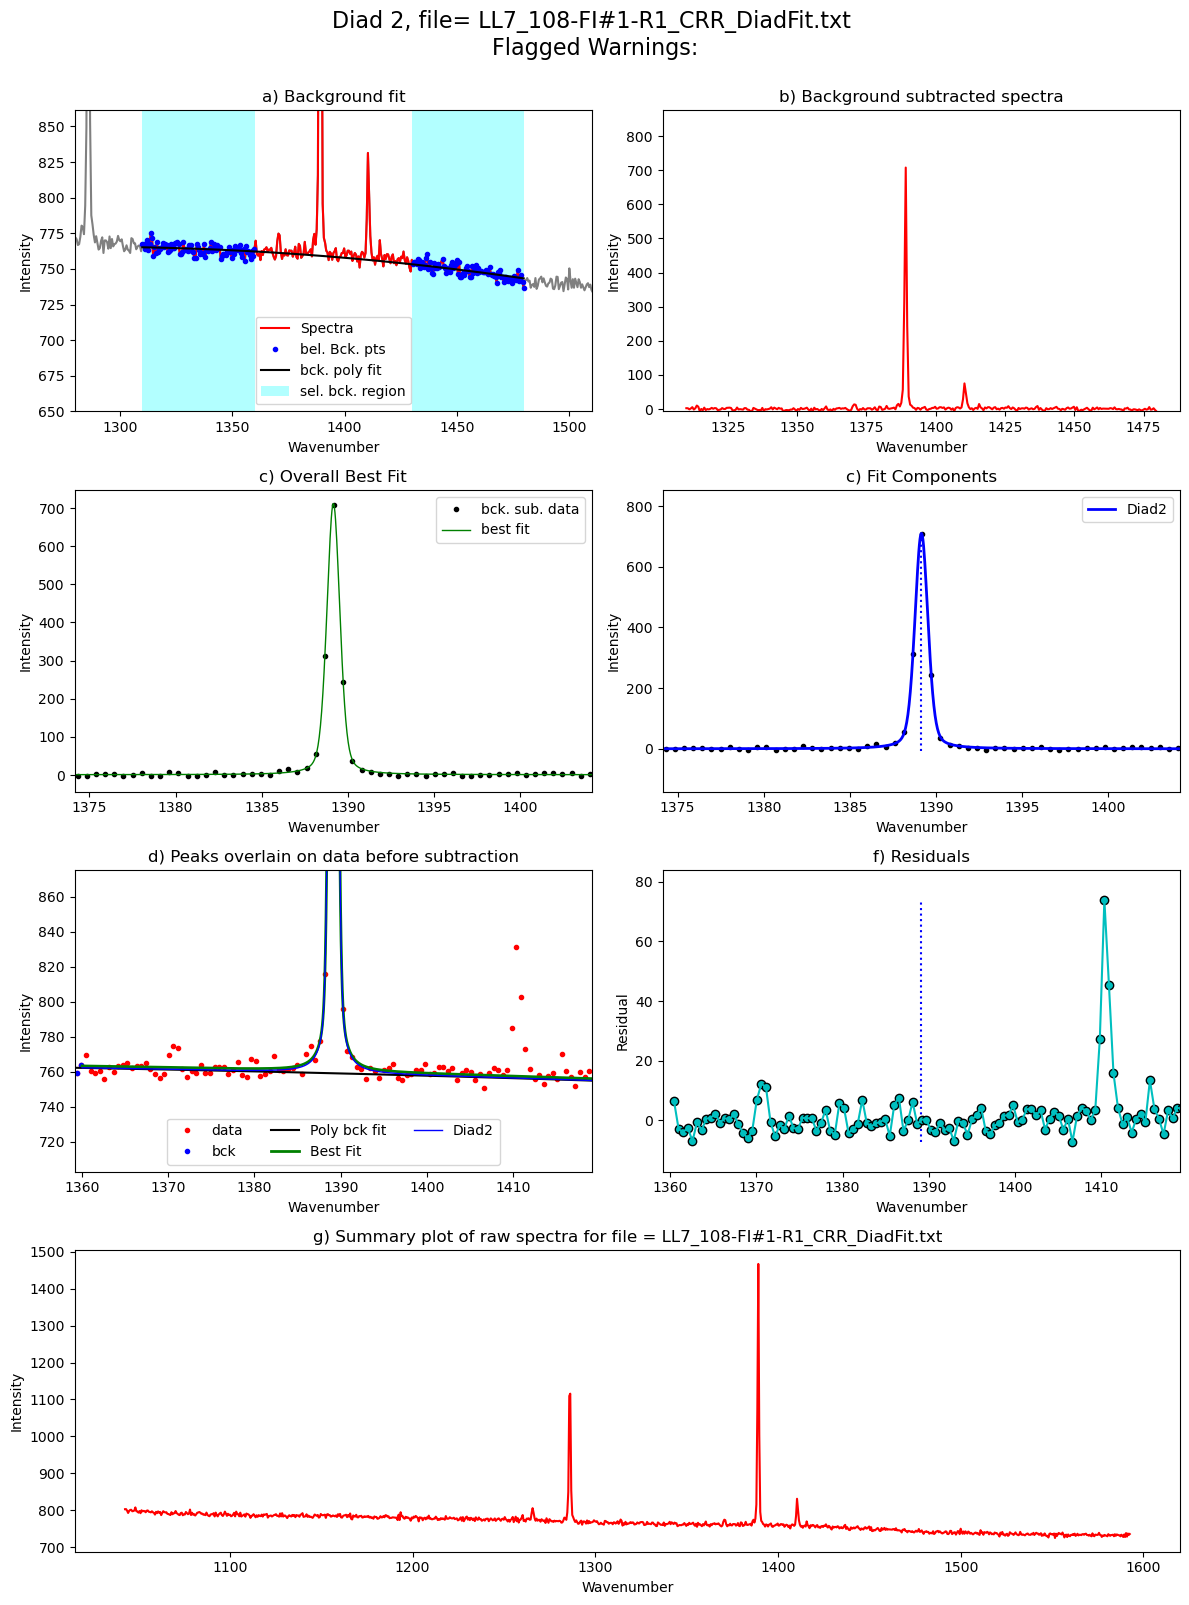

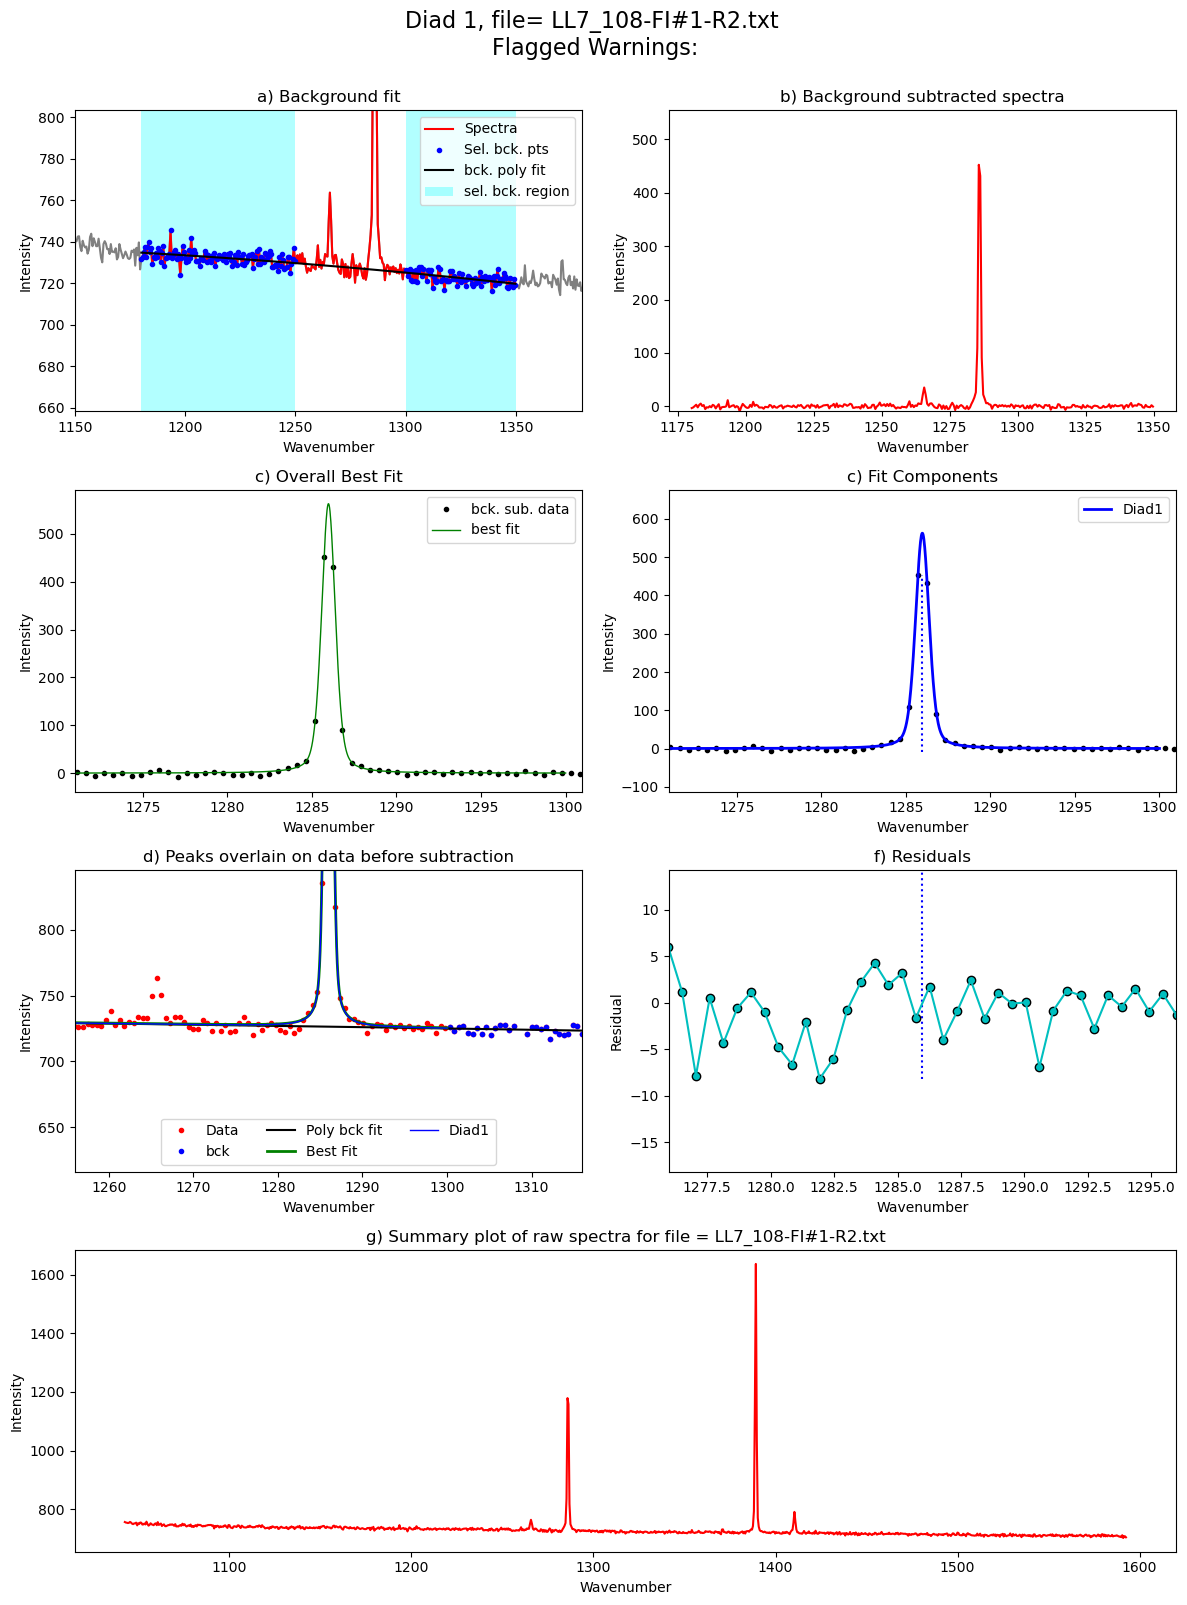

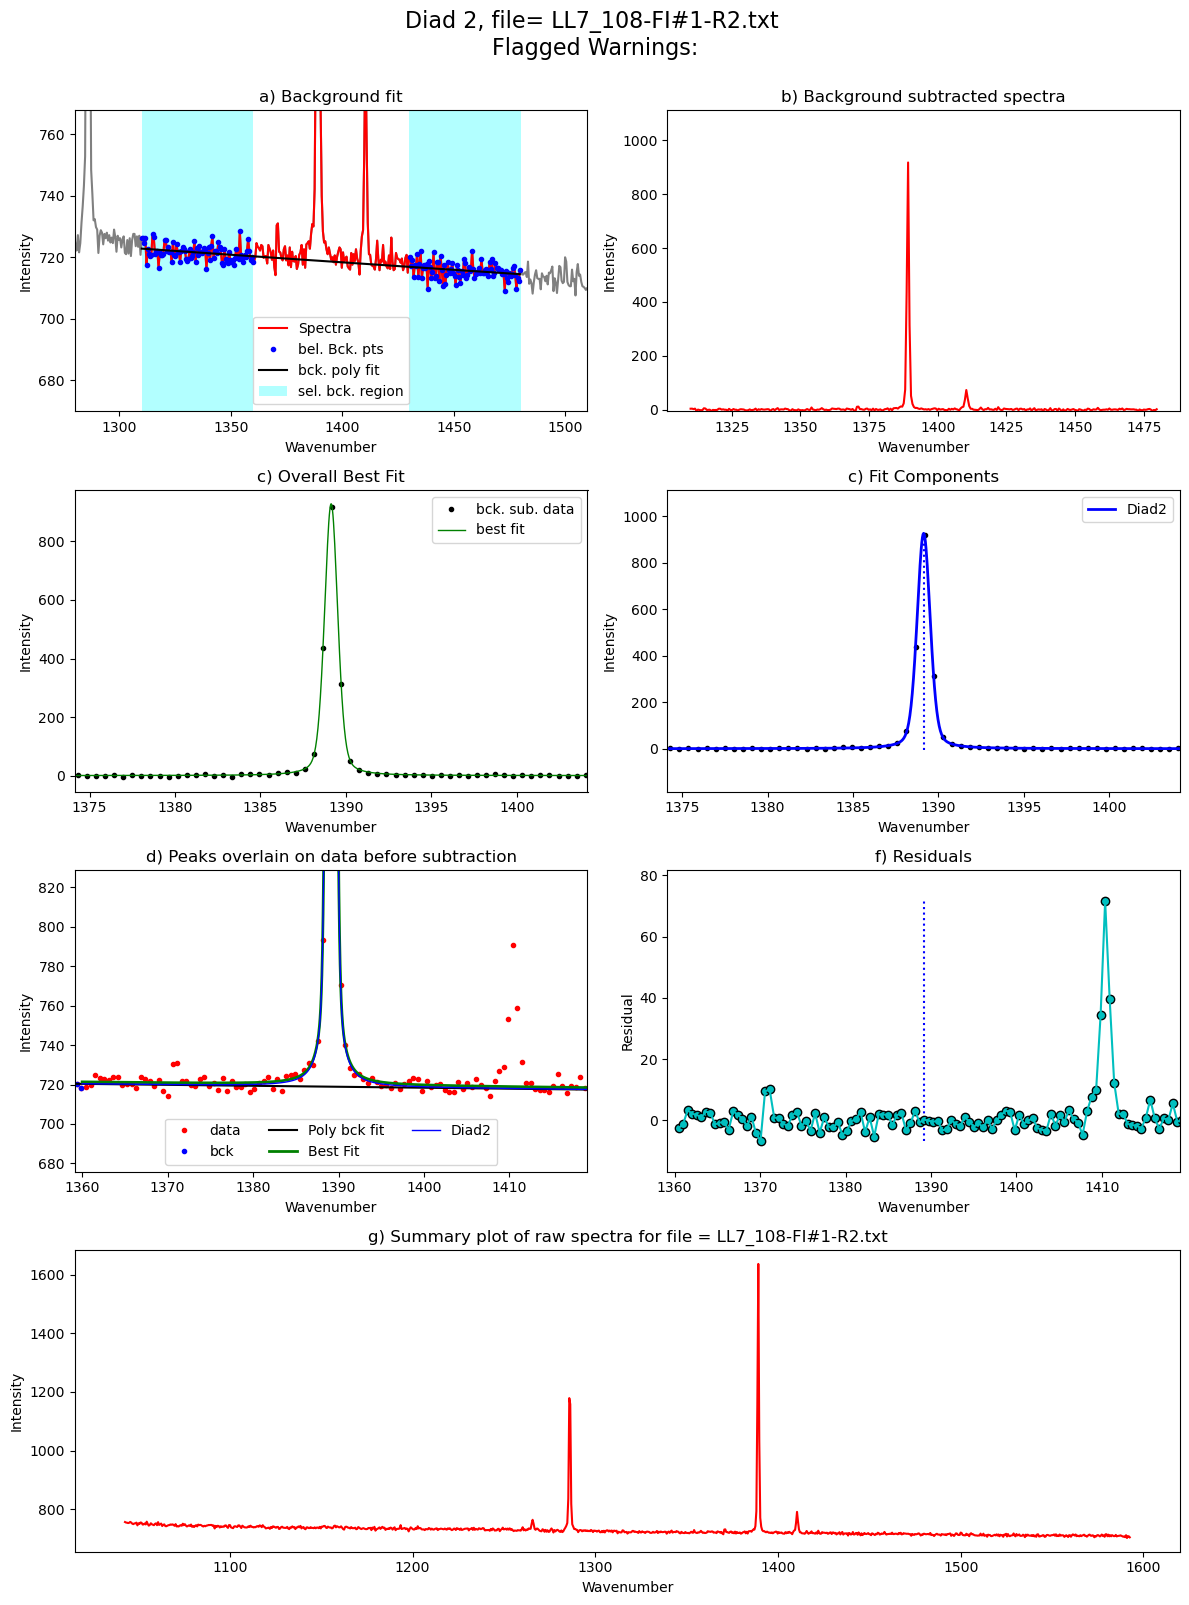

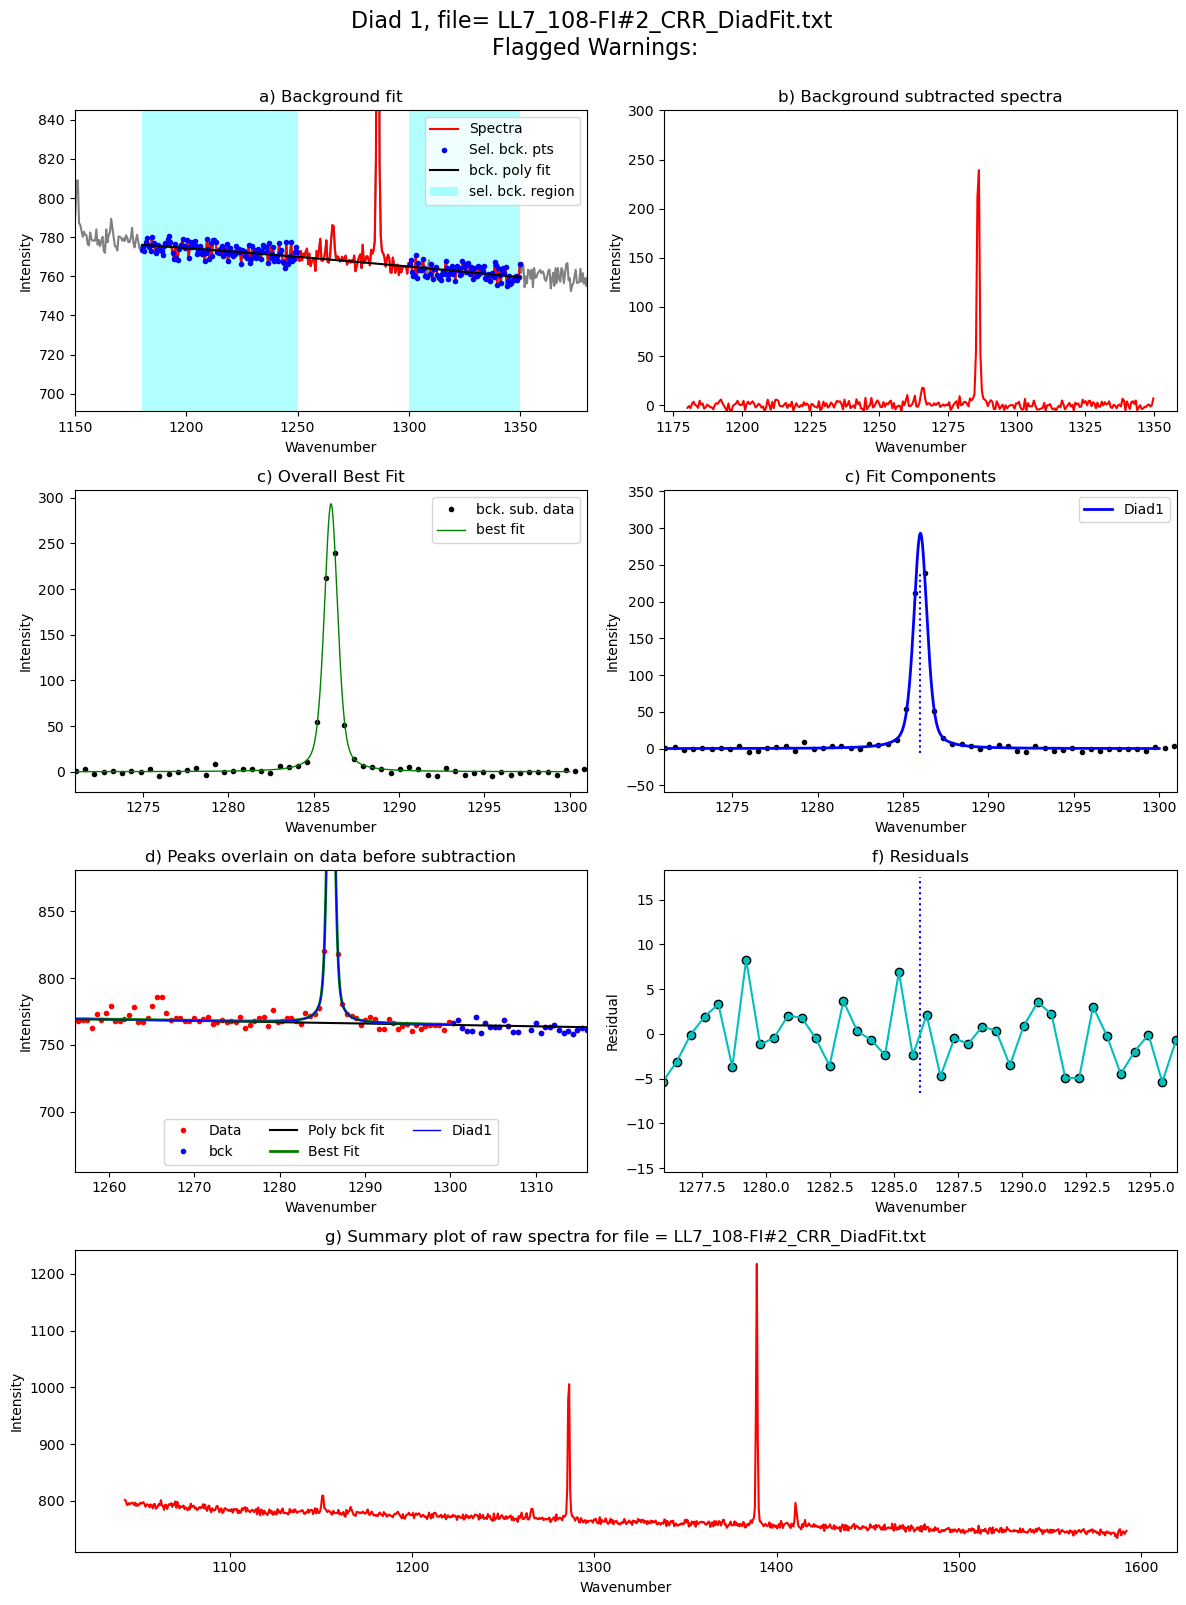

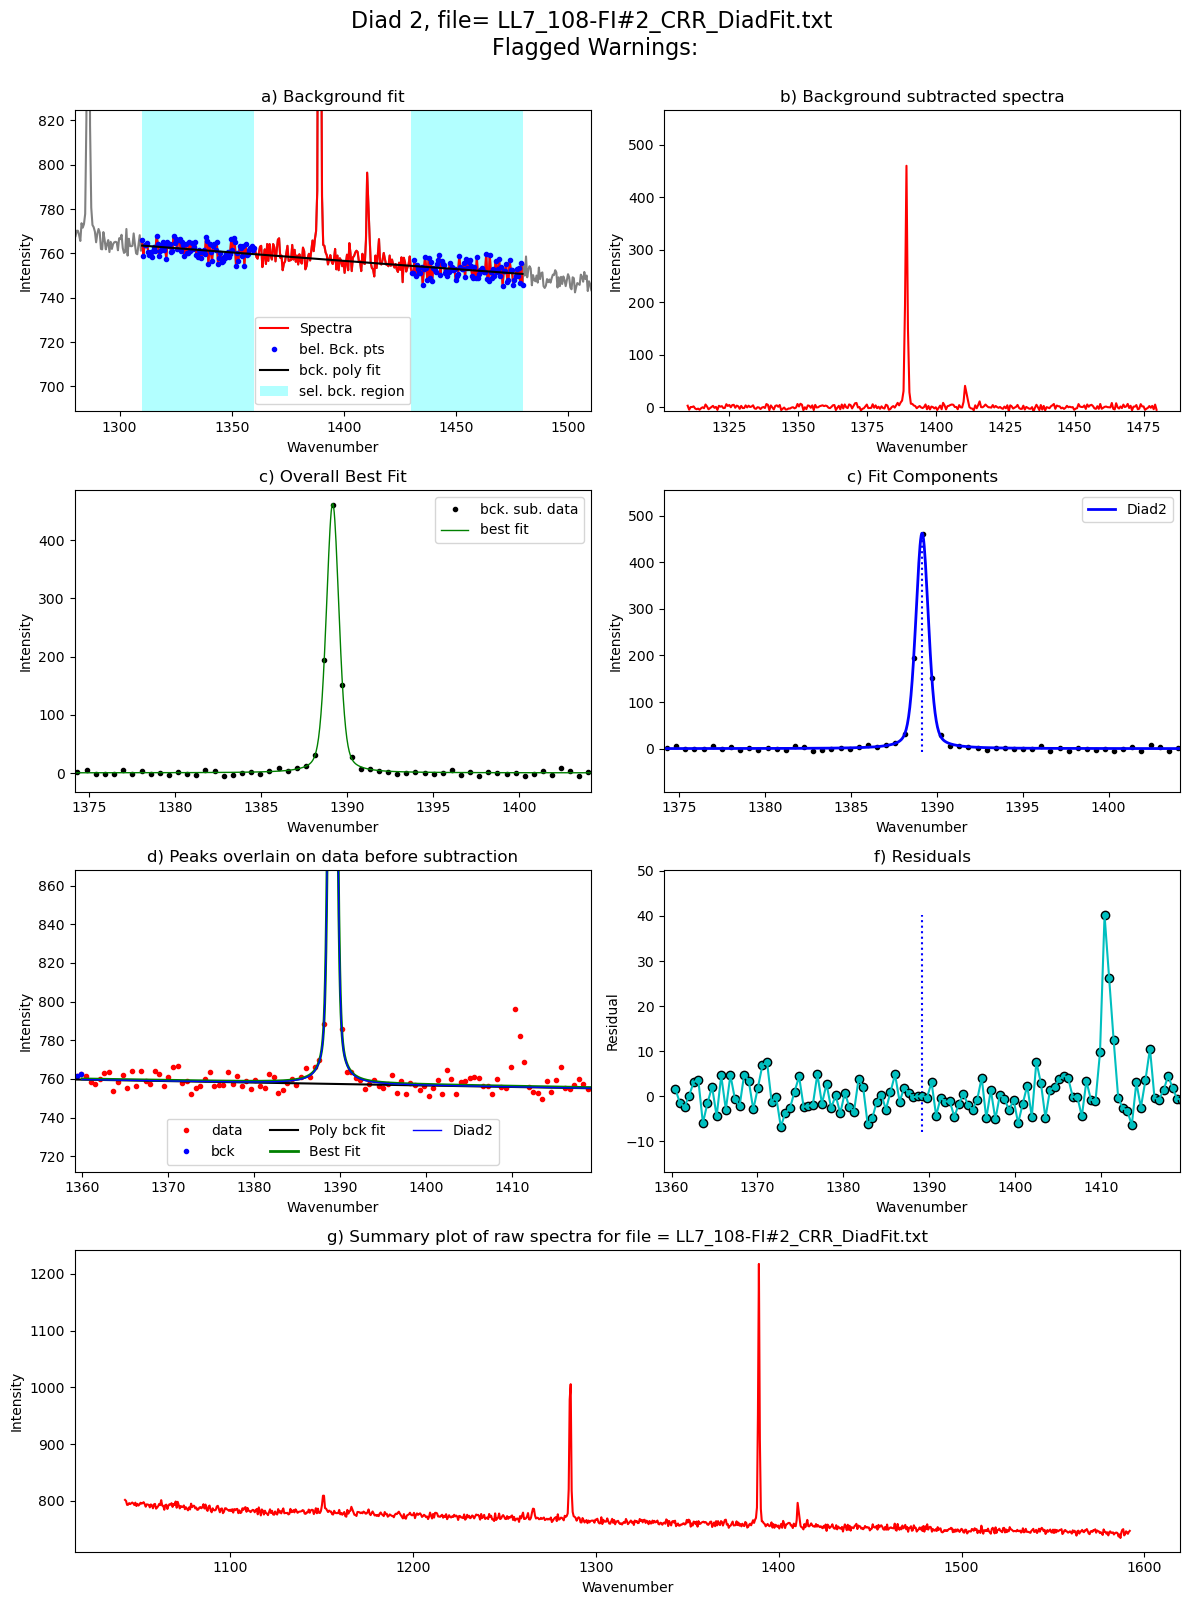

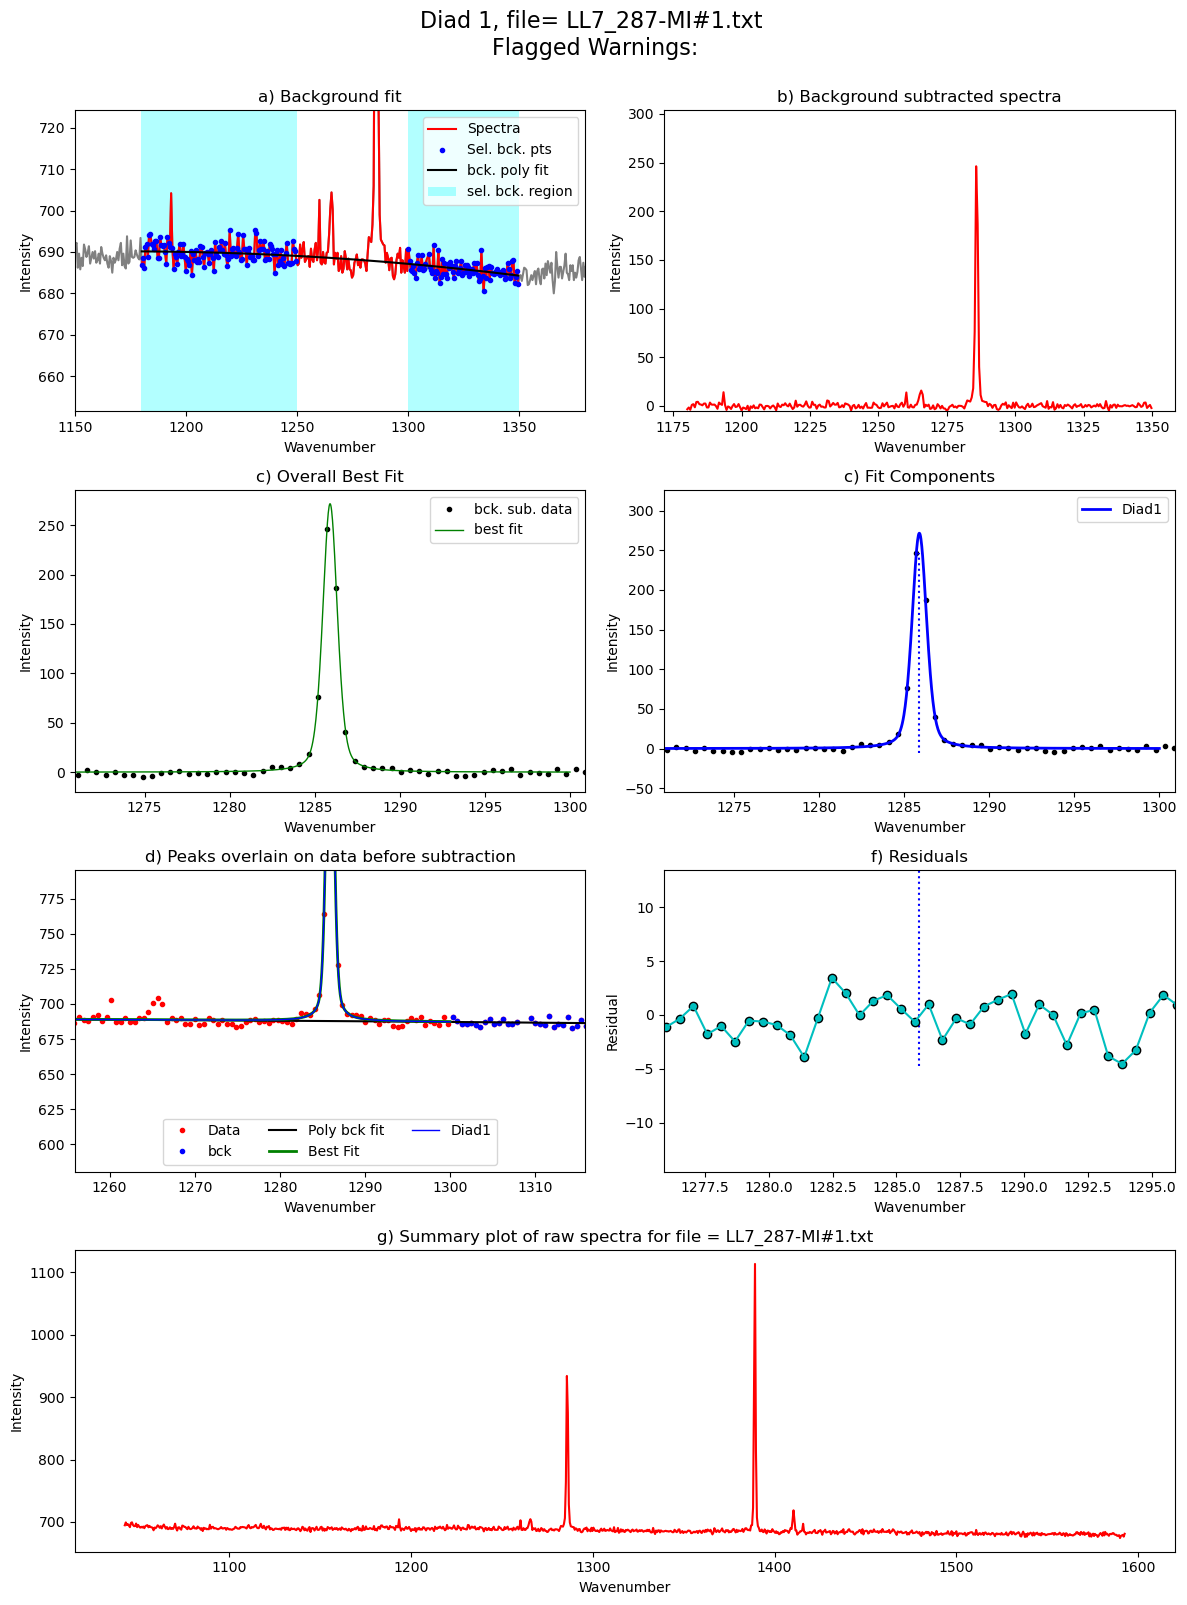

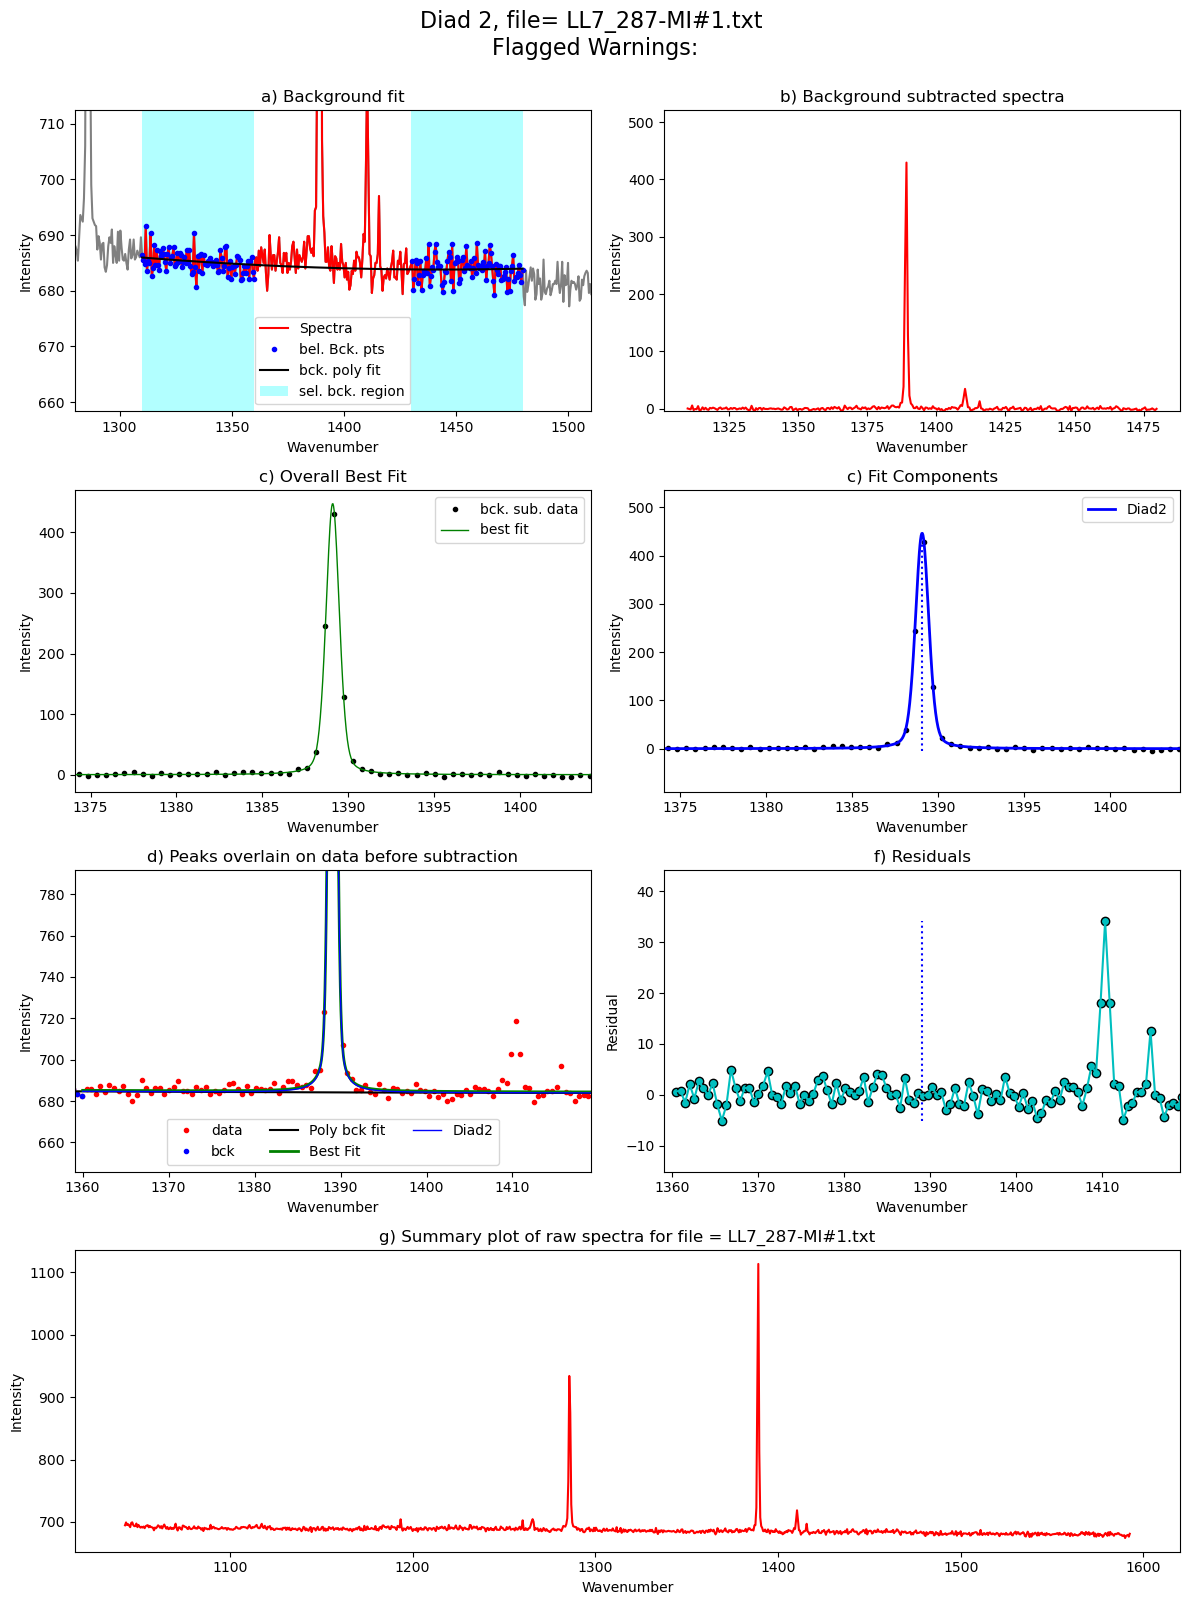

In [19]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


### Get file names that flagged a warning

In [20]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

2
0    LL4_12-FI#2_CRR_DiadFit
0                LL4_27-FI#1
Name: filename, dtype: object


### Have a look at different parameters
- This can help you spot really bad fits

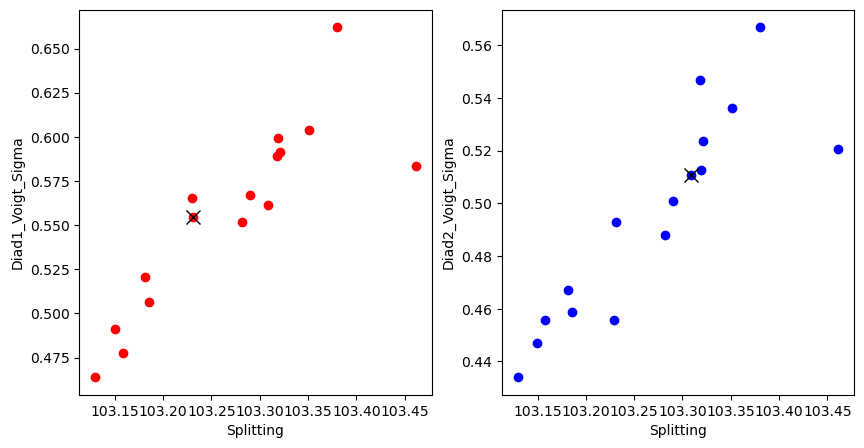

In [21]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

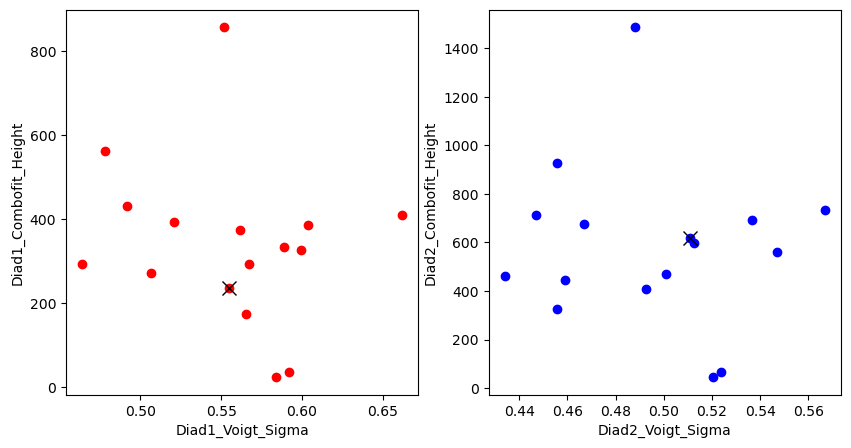

In [22]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [23]:
## Save parameters to excel

In [24]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')

In [25]:
combo.head()

filename   Splitting  Split_err_abs  Split_err_quadrature  \
0              LL4_10-MI#1  103.281817       0.008441              0.005972   
0  LL4_12-FI#1_CRR_DiadFit  103.229512       0.005970              0.004461   
0  LL4_12-FI#2_CRR_DiadFit  103.230873       0.004170              0.004170   
0  LL4_12-MI#2_CRR_DiadFit  103.181124       0.008688              0.006205   
0   LL4_2-FI#1_CRR_DiadFit  103.317645       0.009009              0.006378   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1285.644293        0.004088             857.097051   
0          1285.723793        0.001965             174.461471   
0          1285.709928        0.000000             236.377785   
0          1285.821443        0.004962             393.866551   
0          1285.443086        0.004728             333.693130   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  ...  HB2_Sigma  \
0       1285.644293       1231.456084           0.552023  ...        NaN   
0       1285.723793        242.703613           0.565339  ...        NaN   
0       1285.709928        328.727258           0.554822  ...        NaN   
0       1285.821443        512.400836           0.520837  ...        NaN   
0       1285.443086        523.748100           0.588873  ...        NaN   

   C13_Cent  C13_Area C13_Sigma  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   
0       NaN       NaN       NaN               NaN               NaN   

   Diad2_Gauss_Sigma  Diad1_Gauss_Cent  Diad1_Gauss_Area  Diad1_Gauss_Sigma  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  
0                NaN               NaN               NaN                NaN  

[5 rows x 40 columns]

In [26]:
from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3_FitAll_Together is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()